In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
pip install imbalanced-learn

In [ ]:
!pip install missingno

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy import stats
import missingno as msno
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path ="/content/drive/MyDrive/botnet_dataset/Ennio_Doorbell.csv"
df=pd.read_csv(path)
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000             0.00000          1.000000   
1          1.000000       70.000000             0.00000          1.000000   
2          1.000023       89.999548             0.00904          1.001631   
3          1.000000       60.000000             0.00000          1.000000   
4          1.000000      590.000000             0.00000          1.000000   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000        0.000000e+00          1.000000       60.000000   
1       70.000000        0.000000e+00          1.000000       70.000000   
2       89.967432        6.503024e-01          1.117713       87.893685   
3       60.000000        4.550000e-13          1.000091       60.000000   
4      590.000000        0.000000e+00          1.000000      590.000000   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0        0.000000e+00     1.000000  ...             1.0          60.0   
1        0.000000e+00     1.000000  ...             1.0          70.0   
2        3.768974e+01     1.000023  ...             1.0          90.0   
3        4.550000e-13     1.000000  ...             1.0          60.0   
4        0.000000e+00     1.000000  ...             1.0         590.0   

    HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  \
0  0.000000e+00                 0.0          0.0        1.000000   
1  0.000000e+00                 0.0          0.0        1.000000   
2  0.000000e+00                 0.0          0.0        1.000000   
3  6.740000e-07                 0.0          0.0        1.000091   
4  0.000000e+00                 0.0          0.0        1.000000   

   HpHp_L1_mean   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0          60.0  0.000000e+00                 0.0          0.0  
1          70.0  0.000000e+00                 0.0          0.0  
2          90.0  0.000000e+00                 0.0          0.0  
3          60.0  6.740000e-07                 0.0          0.0  
4         590.0  0.000000e+00                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
print(df.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean',
       'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance',
       'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_covariance',
       'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std',
       'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean',
       'HH_L1_std', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_jit_L5_weight',
       'HH_jit_L5_mean', 'HH_jit_L5_variance', 'HH_jit_L3_weight',
       'HH_jit_L3_mean', 'HH_jit_L3_variance', 'HH_jit_L1_weight',
       'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HpHp_L5_weight',
       'HpHp_L5_mean', 'HpHp_L5_std', 'HpHp_L5_covariance', 'HpHp_L5_pcc',
       'HpHp_L3_weight', 'HpHp_L3_mean', 'HpHp_L3_std', 'HpHp_L3_covariance',
       'HpHp_L3_pcc', 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MI_dir_L5_weight      0
MI_dir_L5_mean        0
MI_dir_L5_variance    0
MI_dir_L3_weight      0
MI_dir_L3_mean        0
MI_dir_L3_variance    0
MI_dir_L1_weight      0
MI_dir_L1_mean        0
MI_dir_L1_variance    0
H_L5_weight           0
H_L5_mean             0
H_L5_variance         0
H_L3_weight           0
H_L3_mean             0
H_L3_variance         0
H_L1_weight           0
H_L1_mean             0
H_L1_variance         0
HH_L5_weight          0
HH_L5_mean            0
HH_L5_std             0
HH_L5_covariance      0
HH_L5_pcc             0
HH_L3_weight          0
HH_L3_mean            0
HH_L3_std             0
HH_L3_covariance      0
HH_L3_pcc             0
HH_L1_weight          0
HH_L1_mean            0
HH_L1_std             0
HH_L1_covariance      0
HH_L1_pcc             0
HH_jit_L5_weight      0
HH_jit_L5_mean        0
HH_jit_L5_variance    0
HH_jit_L3_weight      0
HH_jit_L3_mean        0
HH_jit_L3_variance    0
HH_jit_L1_weight      0
HH_jit_L1_mean        0

Null values in DataFrame:
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0                 False           False               False             False   
1                 False           False               False             False   
2                 False           False               False             False   
3                 False           False               False             False   
4                 False           False               False             False   
...                 ...             ...                 ...               ...   
39095             False           False               False             False   
39096             False           False               False             False   
39097             False           False               False             False   
39098             False           False               False             False   
39099             False           False               False             False   

 

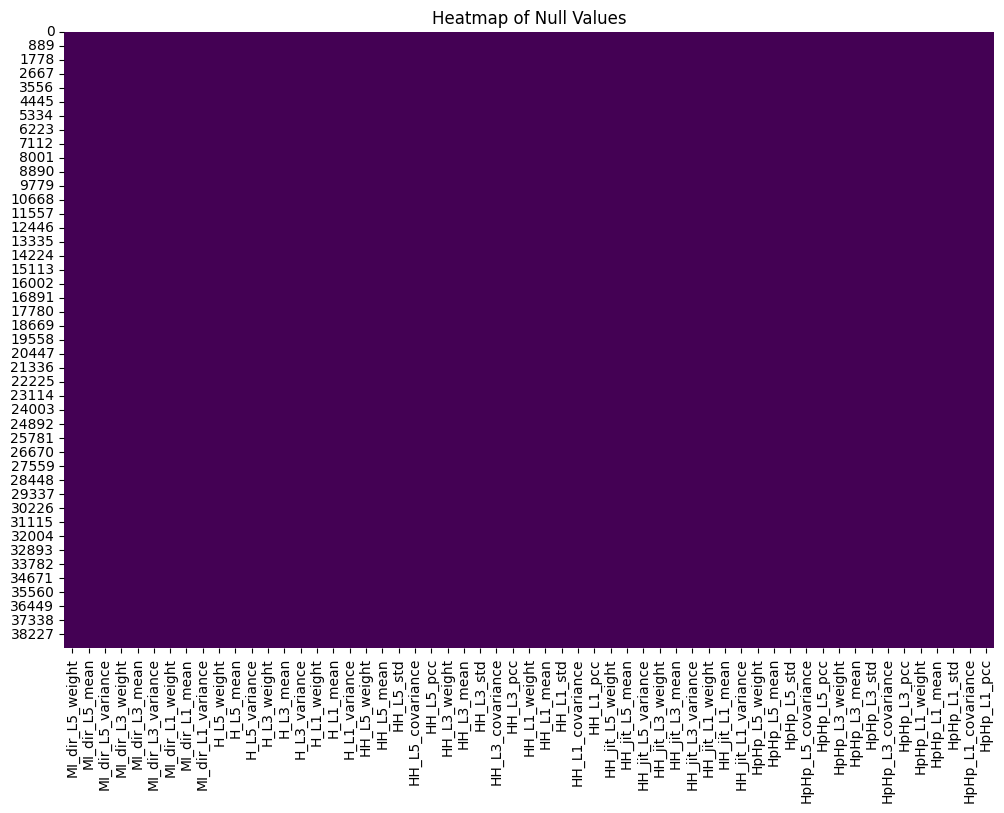

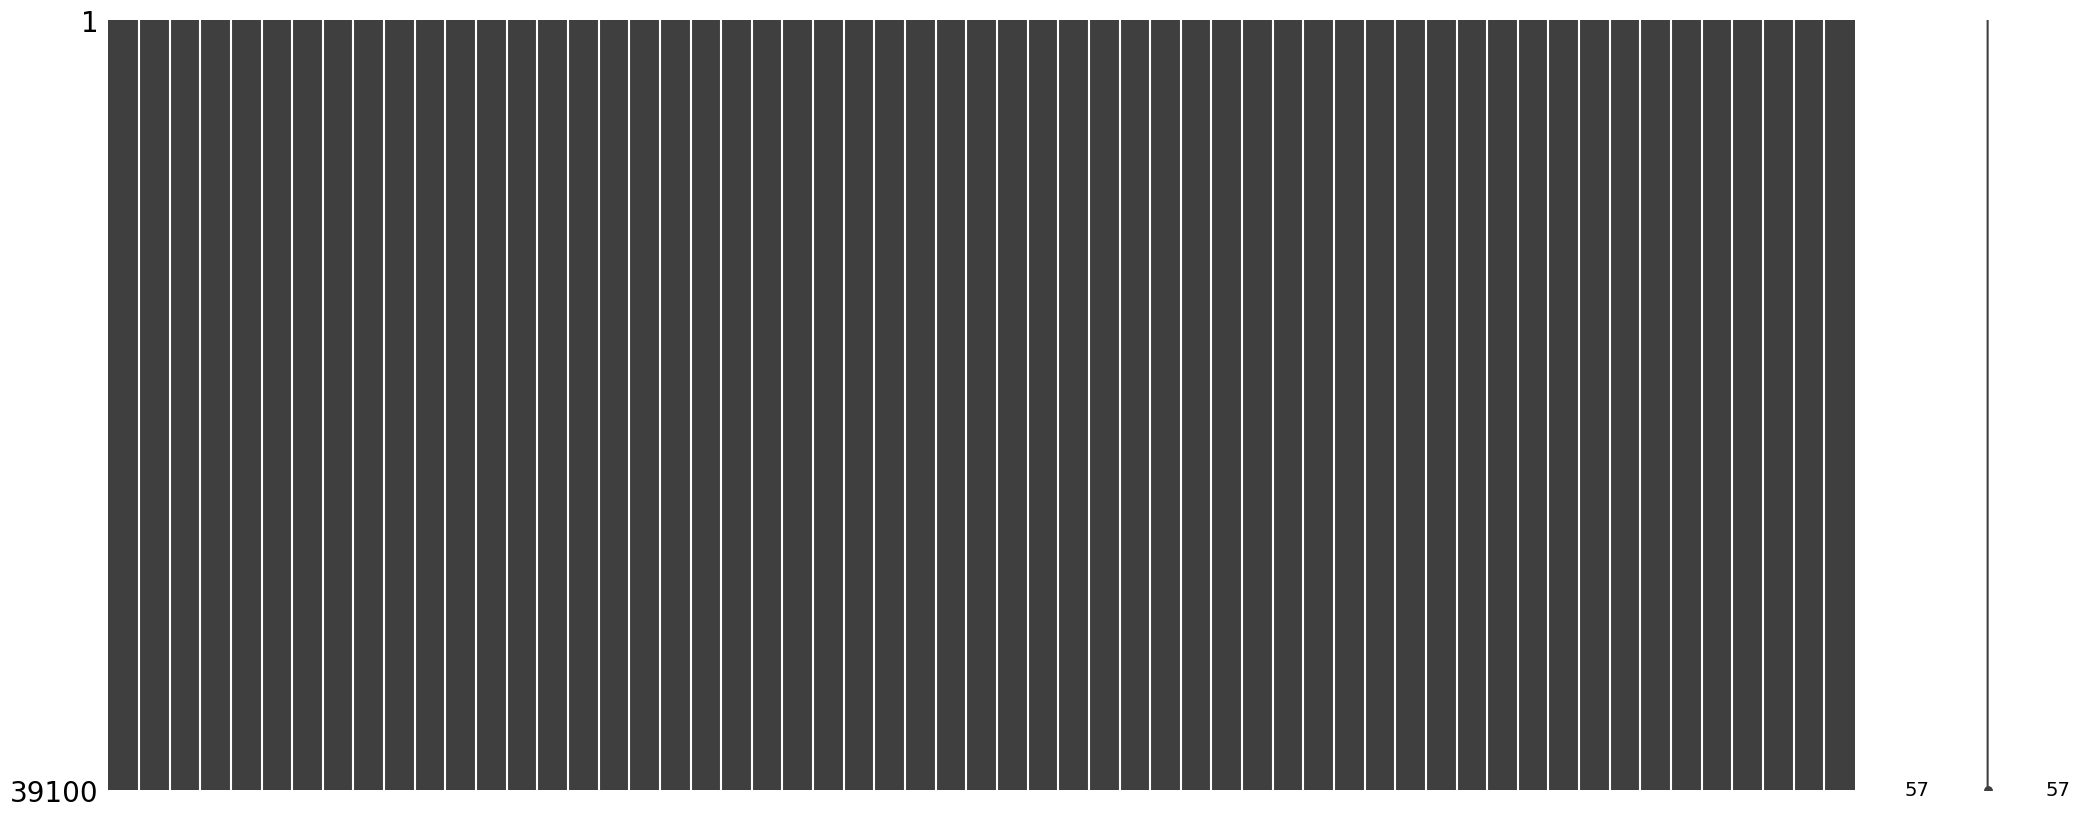

In [ ]:
# Check for null values
print("Null values in DataFrame:")
print(df.isnull())

# Count null values per column
print("\nCount of null values per column:")
print(df.isnull().sum())

# Display rows with null values
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])

# Visualize null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
H_L5_weight           float64
H_L5_mean             float64
H_L5_variance         float64
H_L3_weight           float64
H_L3_mean             float64
H_L3_variance         float64
H_L1_weight           float64
H_L1_mean             float64
H_L1_variance         float64
HH_L5_weight          float64
HH_L5_mean            float64
HH_L5_std             float64
HH_L5_covariance      float64
HH_L5_pcc             float64
HH_L3_weight          float64
HH_L3_mean            float64
HH_L3_std             float64
HH_L3_covariance      float64
HH_L3_pcc             float64
HH_L1_weight          float64
HH_L1_mean            float64
HH_L1_std             float64
HH_L1_covariance      float64
HH_L1_pcc    

In [ ]:
max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
MI_dir_L5_weight      1.025446e+01
MI_dir_L5_mean        5.900000e+02
MI_dir_L5_variance    2.280091e+04
MI_dir_L3_weight      1.450359e+01
MI_dir_L3_mean        5.900000e+02
MI_dir_L3_variance    2.279718e+04
MI_dir_L1_weight      3.151517e+01
MI_dir_L1_mean        5.900000e+02
MI_dir_L1_variance    2.279886e+04
H_L5_weight           1.025446e+01
H_L5_mean             5.900000e+02
H_L5_variance         2.280091e+04
H_L3_weight           1.450359e+01
H_L3_mean             5.900000e+02
H_L3_variance         2.279718e+04
H_L1_weight           3.151517e+01
H_L1_mean             5.900000e+02
H_L1_variance         2.279886e+04
HH_L5_weight          1.000222e+01
HH_L5_mean            5.900000e+02
HH_L5_std             1.509821e+02
HH_L5_covariance      9.152556e+02
HH_L5_pcc             4.384531e-01
HH_L3_weight          1.402008e+01
HH_L3_mean            5.900000e+02
HH_L3_std             1.507583e+02
HH_L3_covariance      1.101617e+03
HH_L3_pcc             

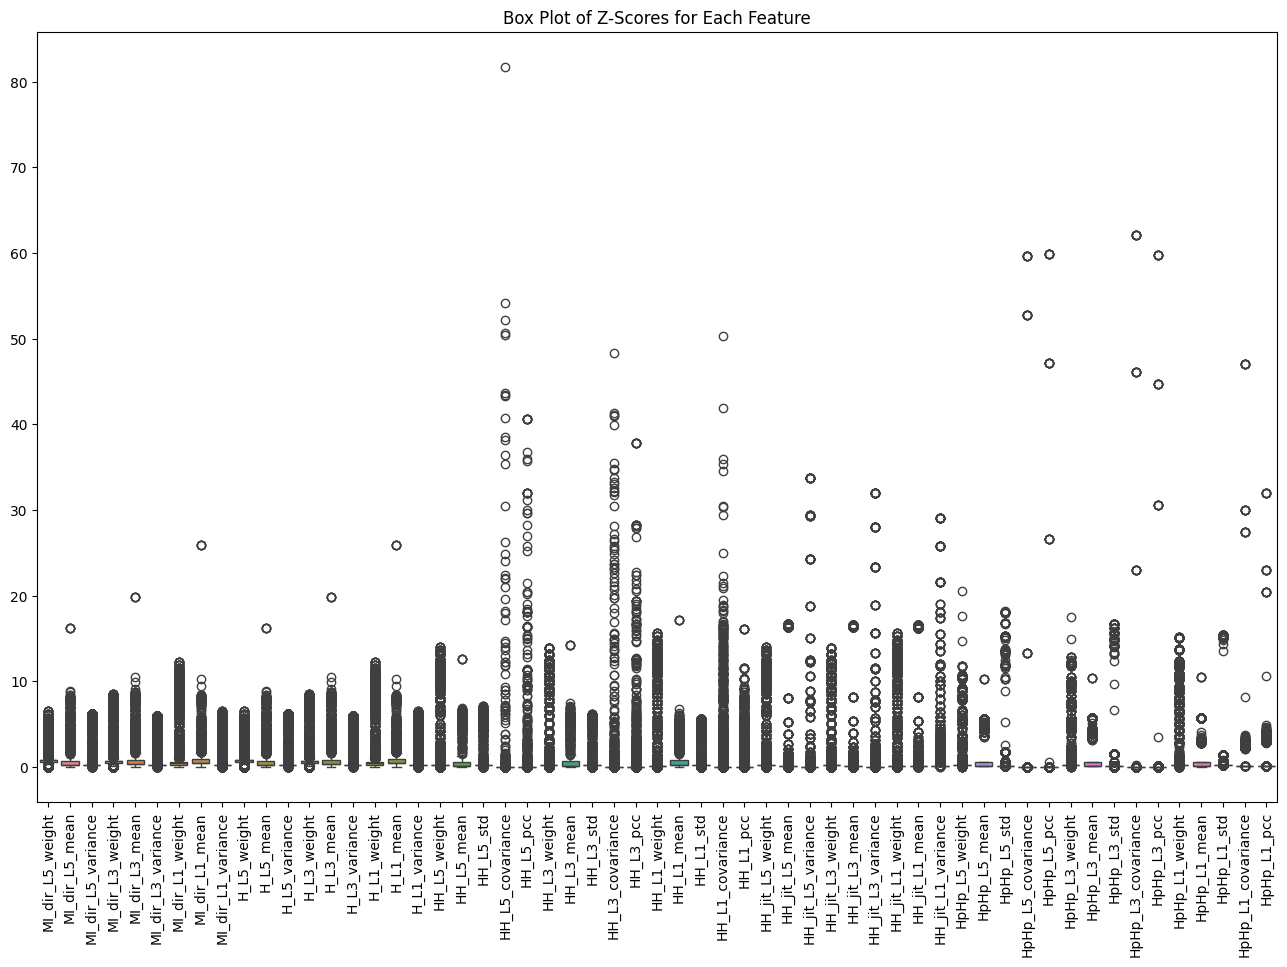

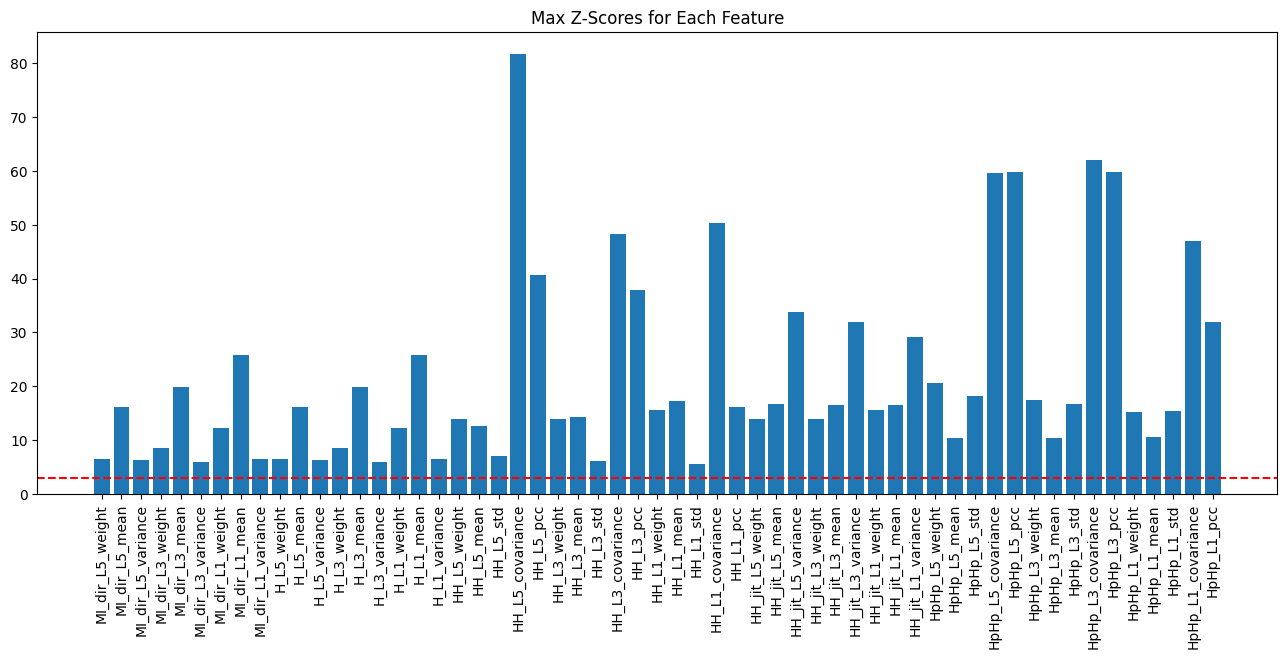

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)
z_scores_df.head()
# Create a box plot for all features
plt.figure(figsize=(16, 10))  # Adjust the size depending on the number of features
sns.boxplot(data=z_scores_df)
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Z-Scores for Each Feature')
plt.show()
# Calculate max Z-score for each feature
max_z_scores = z_scores_df.max()

# Plot the max Z-scores for each feature
plt.figure(figsize=(16, 6))
plt.bar(max_z_scores.index, max_z_scores.values)
plt.axhline(y=3, color='r', linestyle='--')  # Outlier threshold
plt.xticks(rotation=90)
plt.title('Max Z-Scores for Each Feature')
plt.show()

In [ ]:
threshold = 3

# Identify outliers for each feature
outliers = (z_scores_df > threshold)

# Display the rows and features that are outliers
outliers_summary = df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outliers_summary.shape[0]}")

# Display the first few rows with outliers
outliers_summary.head()

Number of rows with outliers: 5104


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000        0.000000e+00          1.000000   
1          1.000000       70.000000        0.000000e+00          1.000000   
2          1.000023       89.999548        9.039795e-03          1.001631   
4          1.000000      590.000000        0.000000e+00          1.000000   
5          1.154996      590.000000        5.820000e-11          1.326732   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1       70.000000            0.000000          1.000000       70.000000   
2       89.967432            0.650302          1.117713       87.893685   
4      590.000000            0.000000          1.000000      590.000000   
5      590.000000            0.000000          1.688754      590.000000   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0        0.000000e+00     1.000000  ...        1.000000          60.0   
1        0.000000e+00     1.000000  ...        1.000000          70.0   
2        3.768974e+01     1.000023  ...        1.000000          90.0   
4        0.000000e+00     1.000000  ...        1.000000         590.0   
5        5.820000e-11     1.154996  ...        1.326732         590.0   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0          0.0                 0.0          0.0        1.000000          60.0   
1          0.0                 0.0          0.0        1.000000          70.0   
2          0.0                 0.0          0.0        1.000000          90.0   
4          0.0                 0.0          0.0        1.000000         590.0   
5          0.0                 0.0          0.0        1.688754         590.0   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     0.000000                 0.0          0.0  
2     0.000000                 0.0          0.0  
4     0.000000                 0.0          0.0  
5     0.000008                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
# Count of outliers per feature
outlier_counts_per_feature = outliers.sum()

# Print the number of outliers per feature
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

Number of outliers per feature:
MI_dir_L5_weight      1125
MI_dir_L5_mean        1121
MI_dir_L5_variance    1134
MI_dir_L3_weight       397
MI_dir_L3_mean        1108
MI_dir_L3_variance    1189
MI_dir_L1_weight       414
MI_dir_L1_mean        1031
MI_dir_L1_variance    1278
H_L5_weight           1125
H_L5_mean             1121
H_L5_variance         1134
H_L3_weight            397
H_L3_mean             1108
H_L3_variance         1189
H_L1_weight            414
H_L1_mean             1031
H_L1_variance         1278
HH_L5_weight           344
HH_L5_mean            1139
HH_L5_std             1155
HH_L5_covariance        57
HH_L5_pcc              113
HH_L3_weight           338
HH_L3_mean            1140
HH_L3_std             1173
HH_L3_covariance       100
HH_L3_pcc              161
HH_L1_weight           318
HH_L1_mean            1144
HH_L1_std             1250
HH_L1_covariance       269
HH_L1_pcc             1052
HH_jit_L5_weight       344
HH_jit_L5_mean         174
HH_jit_L5_variance     

Number of outliers per feature:
MI_dir_L5_weight      1125
MI_dir_L5_mean        1121
MI_dir_L5_variance    1134
MI_dir_L3_weight       397
MI_dir_L3_mean        1108
MI_dir_L3_variance    1189
MI_dir_L1_weight       414
MI_dir_L1_mean        1031
MI_dir_L1_variance    1278
H_L5_weight           1125
H_L5_mean             1121
H_L5_variance         1134
H_L3_weight            397
H_L3_mean             1108
H_L3_variance         1189
H_L1_weight            414
H_L1_mean             1031
H_L1_variance         1278
HH_L5_weight           344
HH_L5_mean            1139
HH_L5_std             1155
HH_L5_covariance        57
HH_L5_pcc              113
HH_L3_weight           338
HH_L3_mean            1140
HH_L3_std             1173
HH_L3_covariance       100
HH_L3_pcc              161
HH_L1_weight           318
HH_L1_mean            1144
HH_L1_std             1250
HH_L1_covariance       269
HH_L1_pcc             1052
HH_jit_L5_weight       344
HH_jit_L5_mean         174
HH_jit_L5_variance     

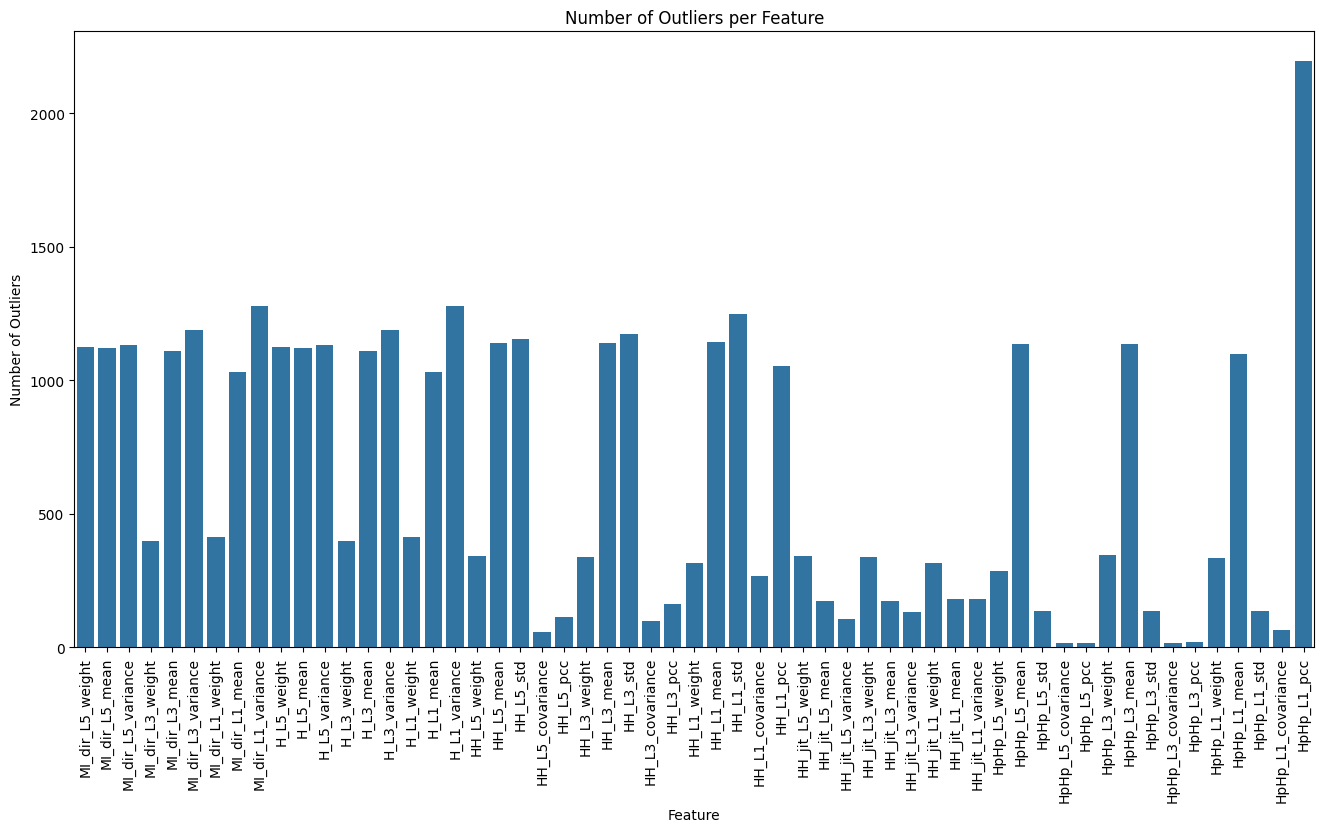

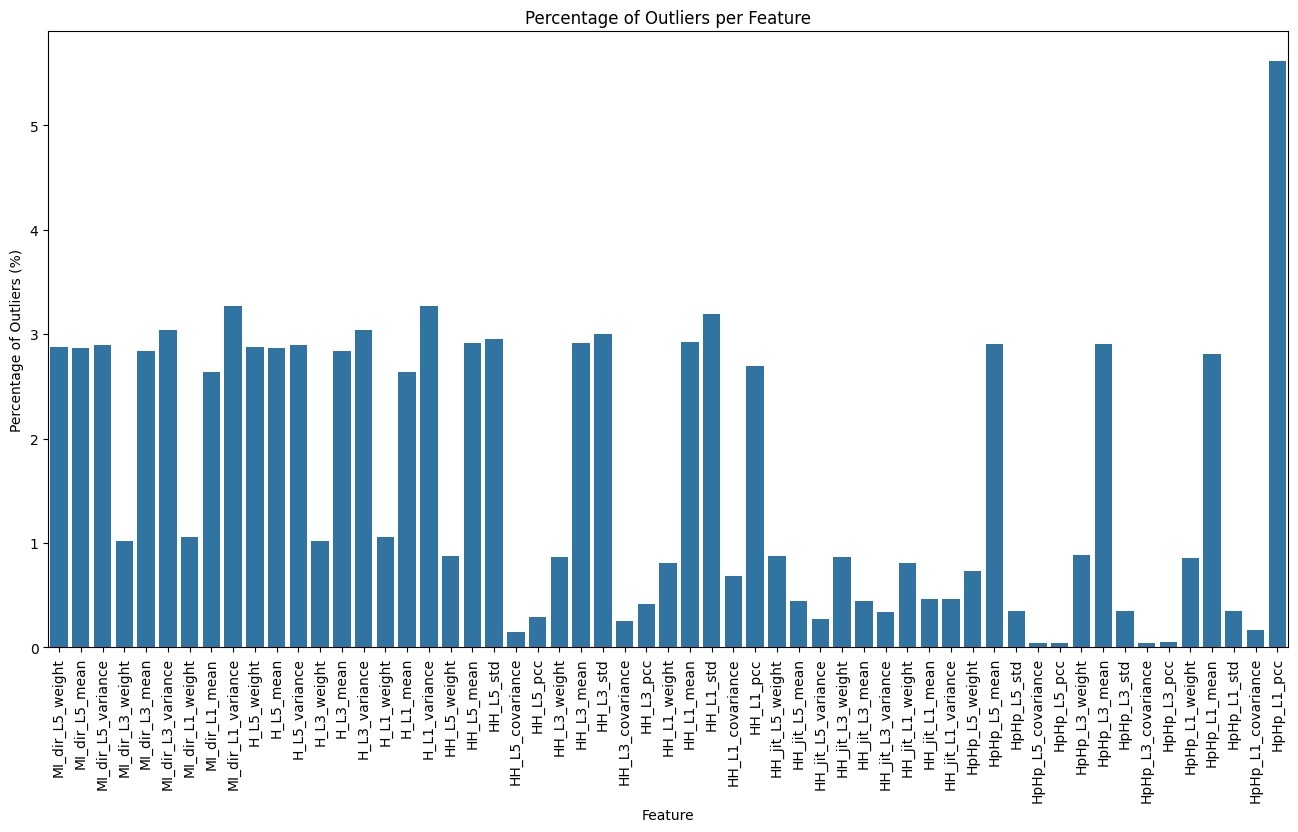

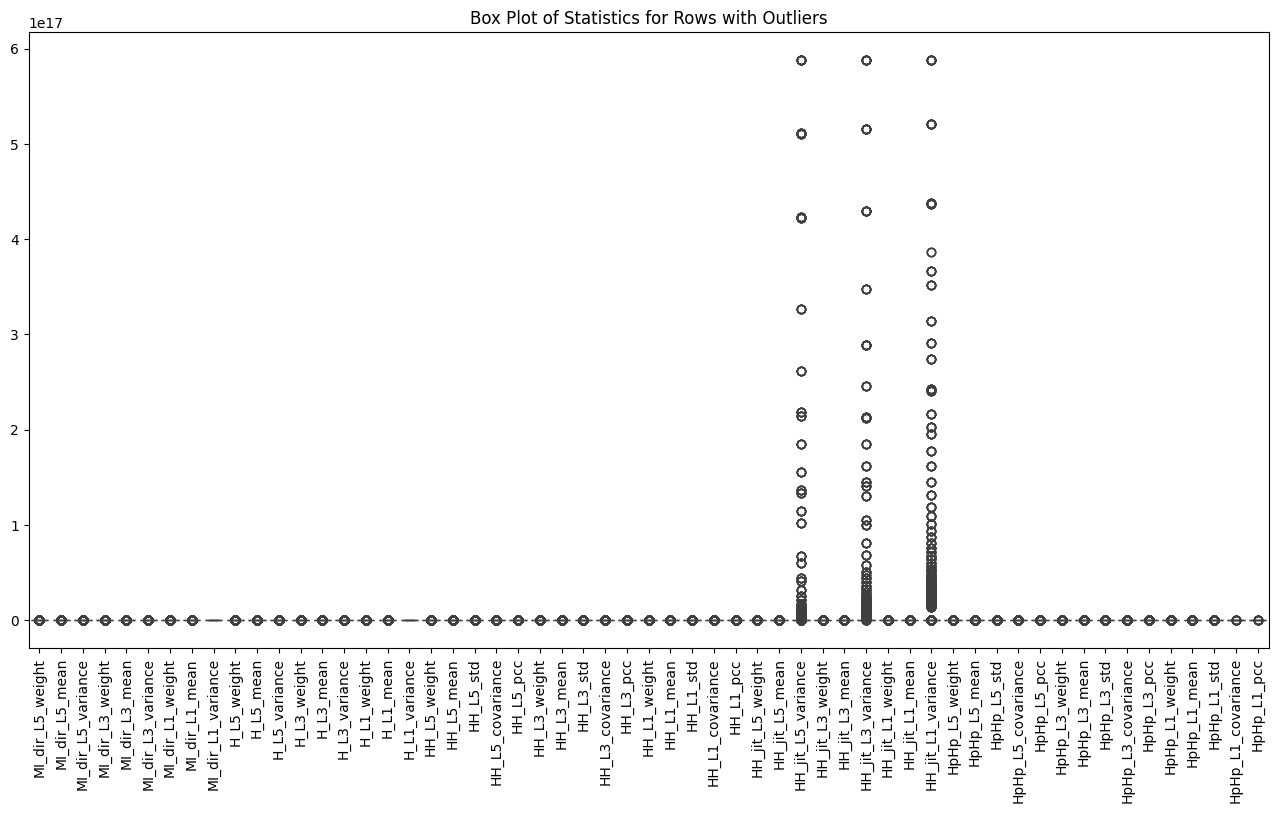

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define threshold
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold)

# Summary of outliers
outliers_summary = df[outliers.any(axis=1)]

# Aggregate statistics for outliers
outlier_counts_per_feature = outliers.sum()
outlier_percentage_per_feature = (outlier_counts_per_feature / df.shape[0]) * 100
outliers_summary_stats = outliers_summary.describe()

# Print outlier counts and percentages
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

print("\nPercentage of outliers per feature:")
print(outlier_percentage_per_feature)

print("\nAggregated statistics for rows with outliers:")
print(outliers_summary_stats)

# Visualize number of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_counts_per_feature.index, y=outlier_counts_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.show()

# Visualize percentage of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_percentage_per_feature.index, y=outlier_percentage_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers per Feature')
plt.show()

# Visualize summary statistics for rows with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers_summary)
plt.xticks(rotation=90)
plt.title('Box Plot of Statistics for Rows with Outliers')
plt.show()

In [ ]:
# Remove rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Check the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

Original dataset shape: (39100, 57)
Cleaned dataset shape: (33996, 57)

First few rows of the cleaned dataset:
    MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
3           1.000000       60.000000        0.000000e+00          1.000000   
14          1.045644       60.002201        6.600857e-02          1.248560   
15          1.000000       73.000000        0.000000e+00          1.000000   
16          1.000000       60.000000        8.620000e-09          1.000001   
18          1.000000       90.000000        0.000000e+00          1.000000   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
3        60.000000        4.550000e-13          1.000091       60.000000   
14       60.126844        3.784971e+00          2.718105       64.132911   
15       73.000000        8.640000e-11          1.000201       72.998217   
16       60.000009        1.128570e-04          1.008742       60.112652   
18       90.000000        3.210000e-10  

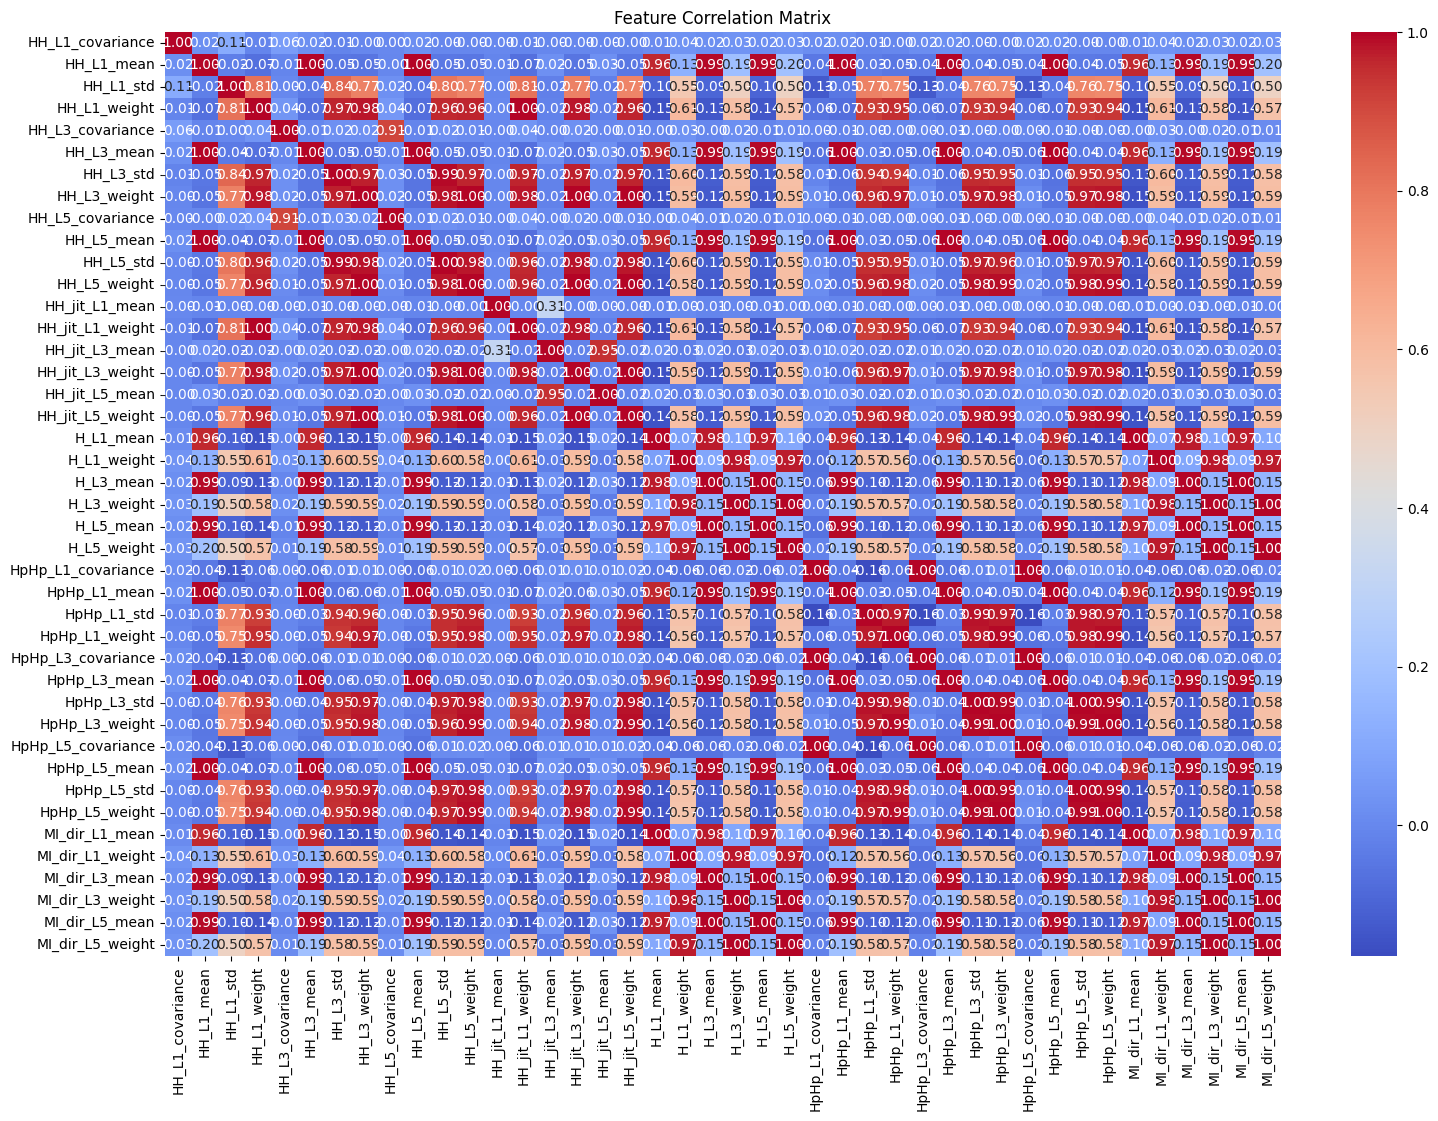

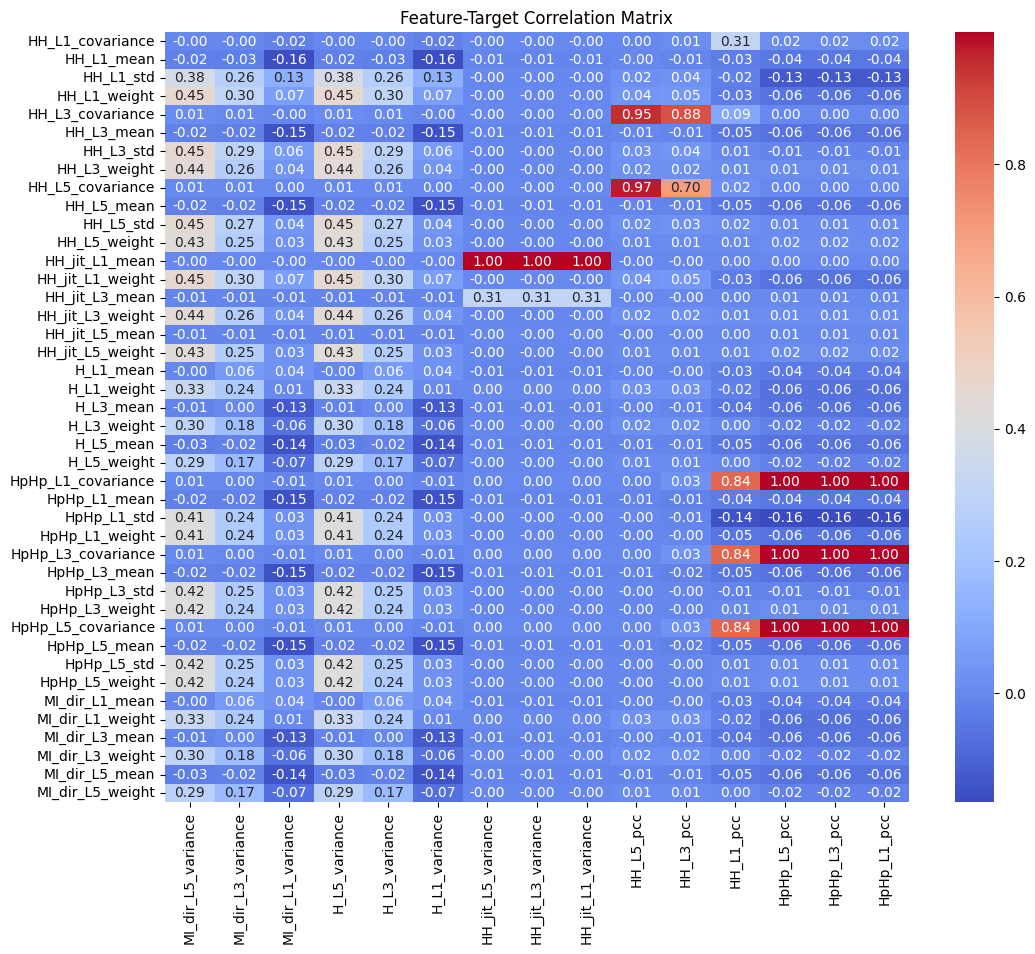

Descriptive Statistics for Features:
       HH_L1_covariance    HH_L1_mean     HH_L1_std  HH_L1_weight  \
count      3.399600e+04  33996.000000  3.399600e+04  33996.000000   
mean       1.398730e-01     77.592091  1.192214e+00      1.060073   
std        4.142490e+00     14.287226  4.083707e+00      0.228233   
min       -1.176277e+02     60.000000  0.000000e+00      1.000000   
25%       -3.747500e-48     60.000001  0.000000e+00      1.000000   
50%        0.000000e+00     90.000000  9.540000e-07      1.000000   
75%        6.950000e-41     90.000000  5.291909e-03      1.000000   
max        1.810954e+02    115.112676  8.333991e+01      2.872540   

       HH_L3_covariance    HH_L3_mean     HH_L3_std  HH_L3_weight  \
count      3.399600e+04  33996.000000  33996.000000  33996.000000   
mean       3.478245e-05     77.556028      0.826759      1.051892   
std        5.592346e-03     14.355029      3.326763      0.217968   
min       -4.597447e-01     60.000000      0.000000      1.000000

In [ ]:
# Define target columns
target_columns = [
    'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]

# Extract feature columns (excluding target columns)
feature_columns = df_cleaned.columns.difference(target_columns)

# Extract features and targets
X = df_cleaned[feature_columns]
y = df_cleaned[target_columns]

# Compute correlation matrix for features
feature_correlation_matrix = X.corr()

# Plot the correlation matrix for features
plt.figure(figsize=(18, 12))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for features with each target variable
target_correlation_matrix = pd.DataFrame({target: X.corrwith(df_cleaned[target]) for target in target_columns})

# Plot the correlation matrix for features with each target variable
plt.figure(figsize=(12, 10))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Matrix')
plt.show()

# Descriptive statistics for features
print("Descriptive Statistics for Features:")
print(X.describe())

# Descriptive statistics for target variables
print("\nDescriptive Statistics for Target Variables:")
print(y.describe())


In [ ]:
# Define features
target_columns = [
                     'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]
feature_columns = df.columns.difference(target_columns)

X = df_cleaned[feature_columns]

# Compute the correlation matrix for features
correlation_matrix = X.corr()
# Define the threshold for highly correlated features
high_corr_threshold = 3
# Extract pairs of highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return corr_pairs

high_corr_pairs = get_highly_correlated_features(correlation_matrix, high_corr_threshold)

# Print the highly correlated pairs
print("Highly Correlated Features (Correlation > 3):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly Correlated Features (Correlation > 3):


Distance Matrix:
                    HH_L1_covariance  HH_L1_mean  HH_L1_std  HH_L1_weight  \
HH_L1_covariance            0.000000    0.982693   0.888182      1.006521   
HH_L1_mean                  0.982693    0.000000   1.024766      1.066462   
HH_L1_std                   0.888182    1.024766   0.000000      0.188989   
HH_L1_weight                1.006521    1.066462   0.188989      0.000000   
HH_L3_covariance            0.940103    1.006110   0.997615      0.961721   
HH_L3_mean                  0.980849    0.001377   1.040422      1.068382   
HH_L3_std                   1.014158    1.047737   0.161638      0.032797   
HH_L3_weight                1.003507    1.053886   0.225775      0.022199   
HH_L5_covariance            0.999687    1.004399   0.977508      0.955114   
HH_L5_mean                  0.980782    0.001926   1.042271      1.069487   
HH_L5_std                   1.004613    1.045954   0.197723      0.036984   
HH_L5_weight                1.003306    1.049505   0.232397

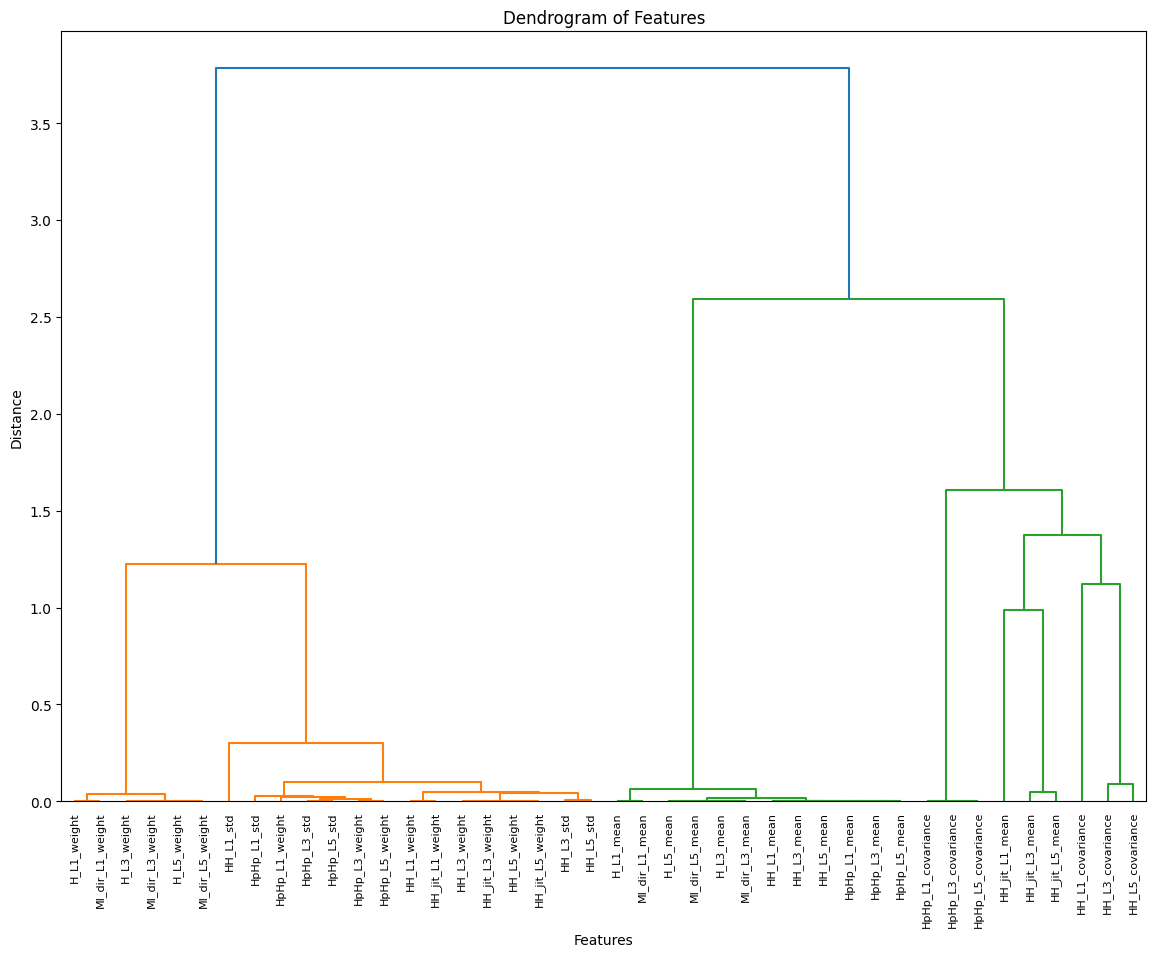

Cluster Summary:
   Cluster                                            Feature
0        1  [H_L1_weight, H_L3_weight, H_L5_weight, MI_dir...
1        2  [HH_L1_std, HH_L1_weight, HH_L3_std, HH_L3_wei...
2        3  [HH_L1_mean, HH_L3_mean, HH_L5_mean, H_L1_mean...
3        4  [HpHp_L1_covariance, HpHp_L3_covariance, HpHp_...
4        5                   [HH_jit_L3_mean, HH_jit_L5_mean]
5        6                                   [HH_jit_L1_mean]
6        7               [HH_L3_covariance, HH_L5_covariance]
7        8                                 [HH_L1_covariance]


In [ ]:
from scipy.spatial.distance import squareform
# Assuming X is your DataFrame of feature columns
correlation_matrix = X.corr()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix

# Make sure the distance matrix is in condensed form
condensed_distance_matrix = squareform(distance_matrix)

# Create linkage matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')

print("Distance Matrix:")
print(distance_matrix)

print("Condensed Distance Matrix:")
print(condensed_distance_matrix)

# Plot dendrogram
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(linkage_matrix, labels=X.columns, leaf_rotation=90)
plt.title('Dendrogram of Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Generate cluster labels
max_d = 0.7  # Example threshold for distance to form clusters, you can adjust this
cluster_labels = fcluster(linkage_matrix, max_d, criterion='distance')

# Create a DataFrame to hold cluster information
feature_clusters = pd.DataFrame({
    'Feature': X.columns,
    'Cluster': cluster_labels
})

# Summarize clusters
cluster_summary = feature_clusters.groupby('Cluster')['Feature'].apply(list).reset_index()
print("Cluster Summary:")
print(cluster_summary)

               Feature  Cluster
0     HH_L1_covariance        3
1           HH_L1_mean        2
2            HH_L1_std        1
3         HH_L1_weight        1
4     HH_L3_covariance        3
5           HH_L3_mean        2
6            HH_L3_std        1
7         HH_L3_weight        1
8     HH_L5_covariance        3
9           HH_L5_mean        2
10           HH_L5_std        1
11        HH_L5_weight        1
12      HH_jit_L1_mean        3
13    HH_jit_L1_weight        1
14      HH_jit_L3_mean        3
15    HH_jit_L3_weight        1
16      HH_jit_L5_mean        3
17    HH_jit_L5_weight        1
18           H_L1_mean        2
19         H_L1_weight        1
20           H_L3_mean        2
21         H_L3_weight        1
22           H_L5_mean        2
23         H_L5_weight        1
24  HpHp_L1_covariance        3
25        HpHp_L1_mean        2
26         HpHp_L1_std        1
27      HpHp_L1_weight        1
28  HpHp_L3_covariance        3
29        HpHp_L3_mean        2
30      

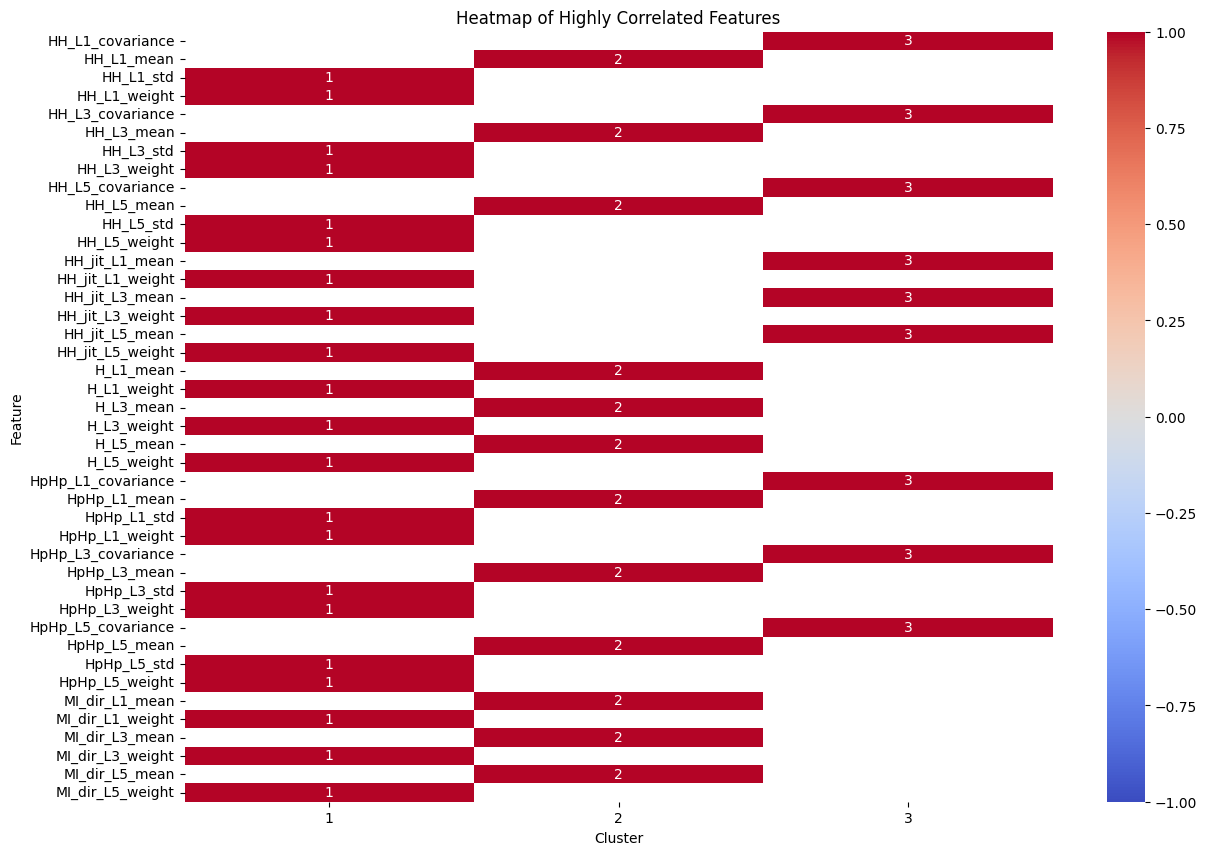

In [ ]:
# Define the maximum distance for clusters
max_distance = 2

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, max_distance, criterion='distance')

# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})
print(feature_clusters)

# Create a pivot table for the heatmap
cluster_pivot = feature_clusters.pivot(index='Feature', columns='Cluster', values='Cluster')

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [ ]:
# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})

# Select one feature per cluster
selected_features = feature_clusters.groupby('Cluster')['Feature'].first().values

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.58186275 0.54215686 0.54792841 0.93184604 0.91689139]
Mean Cross-Validation Accuracy: 0.7041370914632095
Validation Set Performance:
Accuracy: 0.9311764705882353
Precision: 0.3408400117258949
Recall: 0.7549494156637014
F1-Score: 0.3360096465895262
Test Set Performance:
Accuracy: 0.9305800682433227
Precision: 0.3380744040582185
Recall: 0.8102216990386503
F1-Score: 0.3307596956396227

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.56470588 0.92867647 0.92988478 0.93184604 0.92179456]
Mean Cross-Validation Accuracy: 0.8553815453614642
Validation Set Performance:
Accuracy: 0.9343137254901961
Precision: 0.3402302308690486
Recall: 0.39525633470830873
F1-Score: 0.33544286680189317
Test Set Performance:
Accuracy: 0.9341098952817979
Precision: 0.3409173663520401
Recall: 0.44499155770212434
F1-Score: 0.33670516945014817

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Cross-Validation Accuracy Scores: [0.5620098  0.54460784 0.55038    0.55601863 0.53959304]
Mean Cross-Validation Accuracy: 0.5505218623365011
Validation Set Performance:
Accuracy: 0.5513725490196079
Precision: 0.3404227329011933
Recall: 0.5060006594131222
F1-Score: 0.2514878055220182
Test Set Performance:
Accuracy: 0.5526532533239205
Precision: 0.34524576018968434
Recall: 0.5209030799373325
F1-Score: 0.26049616285385374

--------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.58186275 0.54215686 0.54792841 0.93184604 0.91689139]
Mean Cross-Validation Accuracy: 0.7041370914632095
Validation Set Performance:
Accuracy: 0.9311764705882353
Precision: 0.3408400117258949
Recall: 0.7549494156637014
F1-Score: 0.3360096465895262
Test Set Performance:
Accuracy: 0.9305800682433227
Precision: 0.3380744040582185
Recall: 0.8102216990386503
F1-Score: 0.3307596956396227

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.56470588 0.92867647 0.92988478 0.93184604 0.92179456]
Mean Cross-Validation Accuracy: 0.8553815453614642
Validation Set Performance:
Accuracy: 0.9343137254901961
Precision: 0.3402302308690486
Recall: 0.39525633470830873
F1-Score: 0.33544286680189317
Test Set Performance:
Accuracy: 0.9341098952817979
Precision: 0.3409173663520401
Recall: 0.44499155770212434
F1-Score: 0.33670516945014817

--------------------------------------------------

Training model for target: H_L1_variance
Cross-Validation Accuracy Scores: [0.5620098  0.54460784 0.55038    0.55601863 0.53959304]
Mean Cross-Validation Accuracy: 0.5505218623365011
Validation Set Performance:
Accuracy: 0.5513725490196079
Precision: 0.3404227329011933
Recall: 0.5060006594131222
F1-Score: 0.2514878055220182
Test Set Performance:
Accuracy: 0.5526532533239205
Precision: 0.34524576018968434
Recall: 0.5209030799373325
F1-Score: 0.26049616285385374

--------------------------------------------------

Tra

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, 

Cross-Validation Accuracy Scores: [0.64411765        nan 0.62343712 0.62858544 0.62613386]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.6258823529411764
Precision: 0.500261917234154
Recall: 0.8129044910766817
F1-Score: 0.38544515248927935
Test Set Performance:
Accuracy: 0.629838804565243
Precision: 0.5001588814744201
Recall: 0.8148976229701106
F1-Score: 0.3867436547874073

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, 

Cross-Validation Accuracy Scores: [0.64411765        nan 0.62343712 0.62858544 0.62613386]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.6258823529411764
Precision: 0.500261917234154
Recall: 0.8129044910766817
F1-Score: 0.38544515248927935
Test Set Performance:
Accuracy: 0.629838804565243
Precision: 0.5001588814744201
Recall: 0.8148976229701106
F1-Score: 0.3867436547874073

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.98210784 0.98357843 0.98627114 0.98774209 0.98161314]
Mean Cross-Validation Accuracy: 0.9842625307048536
Validation Set Performance:
Accuracy: 0.000196078431372549
Precision: 0.004694835680751174
Recall: 0.3333333333333333
F1-Score: 0.00925925925925926
Test Set Performance:
Accuracy: 0.00023532180256500765
Precision: 0.004901960784313725
Recall: 0.2222222222222222
F1-Score: 0.00959232613908873

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.92867647 0.93137255 0.93601373 0.93993626 0.92767835]
Mean Cross-Validation Accuracy: 0.9327354719774646
Validation Set Performance:
Accuracy: 0.051176470588235295
Precision: 0.32954545454545453
Recall: 0.01707221350078493
F1-Score: 0.03246268656716419
Test Set Performance:
Accuracy: 0.05130015295917167
Precision: 0.3387975794034446
Recall: 0.2392558577652184
F1-Score: 0.04452861952861953

--------------------------------------------------

Training model for target: HH_L1_pcc
Cross-Validation Accuracy Scores: [0.91715686 0.92107843 0.92841383 0.93160088 0.9156656 ]
Mean Cross-Validation Accuracy: 0.92278312158401
Validation Set Performance:
Accuracy: 0.9294117647058824
Precision: 0.4665259644645136
Recall: 0.9763079960513327
F1-Score: 0.5227336478315873
Test Set Performance:
Accuracy: 0.9279915284151077
Precision: 0.44249364715733136
Recall: 0.9619828482670564
F1-Score: 0.4957043523623703

--------------------------------------------------

Trainin

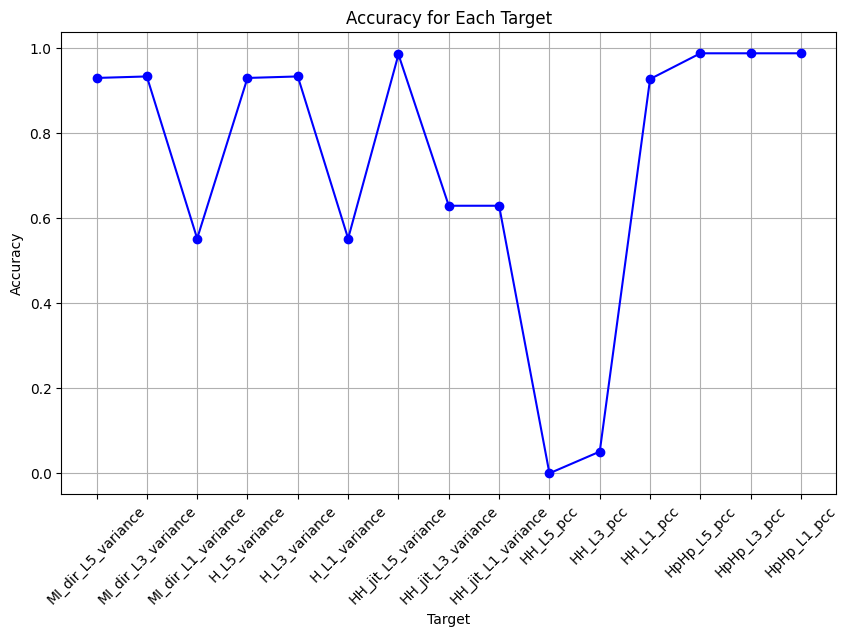

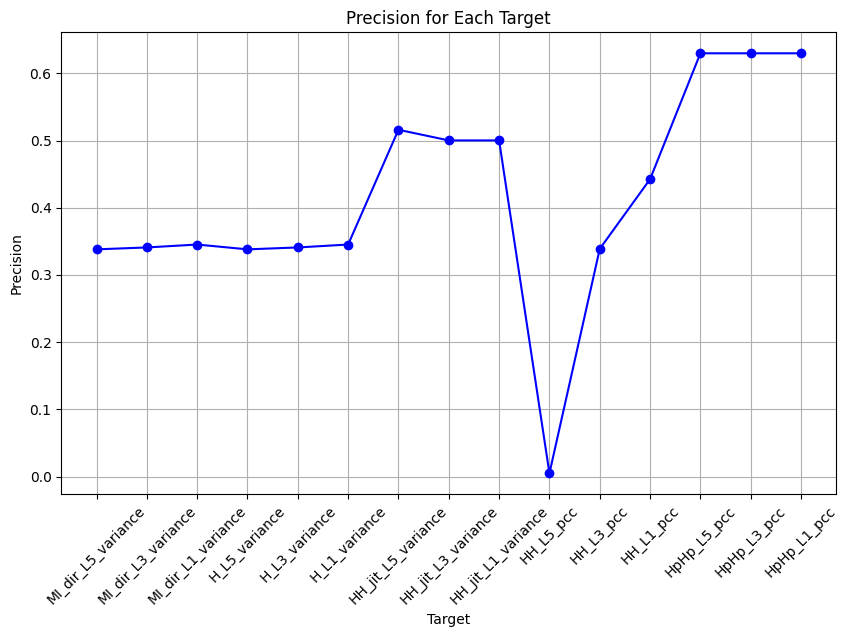

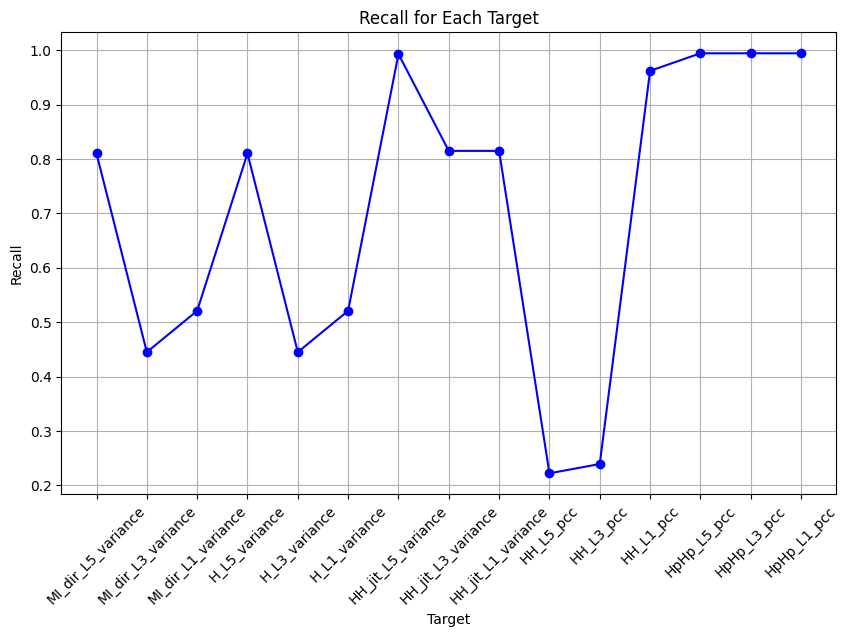

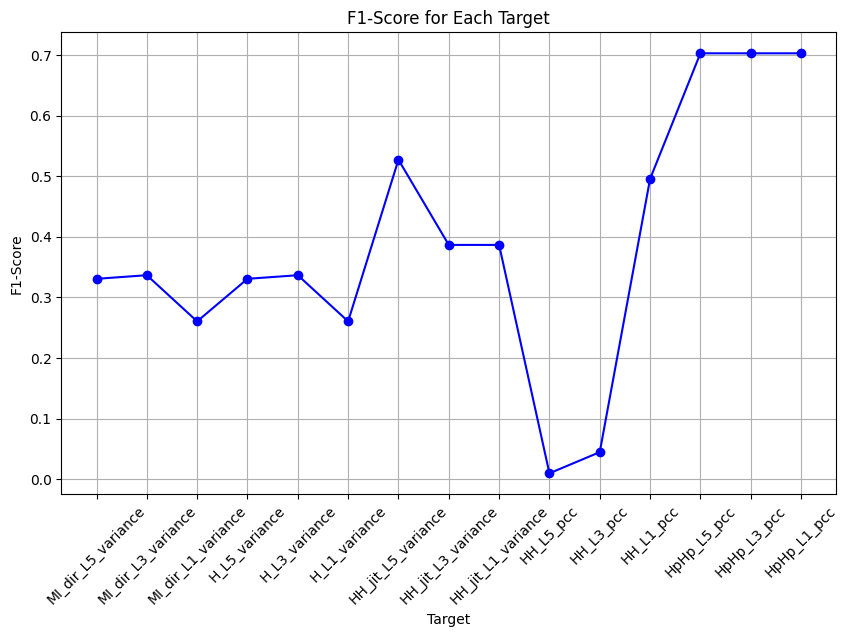

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the SVM model for classification
    model = SVC(kernel='rbf', class_weight='balanced')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.9992156862745099
Precision: 0.3330718954248366
Recall: 0.3333333333333333
F1-Score: 0.3332025630966392
Test Set Performance:
Accuracy: 0.99952935639487
Precision: 0.33317645213162334
Recall: 0.3333333333333333
F1-Score: 0.33325487426934997

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.9982352941176471
Precision: 0.3327450980392157
Recall: 0.3333333333333333
F1-Score: 0.33303895594151706
Test Set Performance:
Accuracy: 0.998823390987175
Precision: 0.3329411303290583
Recall: 0.3333333333333333
F1-Score: 0.33313711639588733

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.99
Precision: 0.247791519434629
Recall: 0.2497032640949555
F1-Score: 0.24874371859296485
Test Set Performance:
Accuracy: 0.9897635015884222
Precision: 0.24

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

Accuracy: 0.9992156862745099
Precision: 0.3330718954248366
Recall: 0.3333333333333333
F1-Score: 0.3332025630966392
Test Set Performance:
Accuracy: 0.99952935639487
Precision: 0.33317645213162334
Recall: 0.3333333333333333
F1-Score: 0.33325487426934997

--------------------------------------------------

Training model for target: H_L3_variance
Validation Set Performance:
Accuracy: 0.9982352941176471
Precision: 0.3327450980392157
Recall: 0.3333333333333333
F1-Score: 0.33303895594151706
Test Set Performance:
Accuracy: 0.998823390987175
Precision: 0.3329411303290583
Recall: 0.3333333333333333
F1-Score: 0.33313711639588733

--------------------------------------------------

Training model for target: H_L1_variance
Validation Set Performance:
Accuracy: 0.99
Precision: 0.247791519434629
Recall: 0.2497032640949555
F1-Score: 0.24874371859296485
Test Set Performance:
Accuracy: 0.9897635015884222
Precision: 0.24758653166941372
Recall: 0.24985149103005821
F1-Score: 0.24871385488735145

---------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precis

Validation Set Performance:
Accuracy: 0.9662745098039216
Precision: 0.33326570636369784
Recall: 0.3221546708504936
F1-Score: 0.32761600850950673
Test Set Performance:
Accuracy: 0.9637604424049888
Precision: 0.3332926432291667
Recall: 0.3212912842237389
F1-Score: 0.32718194527661276

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Validation Set Performance:
Accuracy: 0.9662745098039216
Precision: 0.33326570636369784
Recall: 0.3221546708504936
F1-Score: 0.32761600850950673
Test Set Performance:
Accuracy: 0.9637604424049888
Precision: 0.3332926432291667
Recall: 0.3212912842237389
F1-Score: 0.32718194527661276

--------------------------------------------------

Training model for target: HH_L5_pcc
Validation Set Performance:
Accuracy: 0.000196078431372549
Precision: 0.00010469011725293132
Recall: 0.25
F1-Score: 0.00020929259104227708
Test Set Performance:
Accuracy: 0.00023532180256500765
Precision: 0.00012540757461750688
Recall: 0.25
F1-S

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is i

Accuracy: 0.00035298270384751147
Precision: 0.00018754688672168043
Recall: 0.25
F1-Score: 0.0003748125937031484

--------------------------------------------------

Training model for target: HH_L1_pcc
Validation Set Performance:
Accuracy: 0.993921568627451
Precision: 0.6647035728307813
Recall: 0.4614726504163819
F1-Score: 0.5175013580368438
Test Set Performance:
Accuracy: 0.9937639722320273
Precision: 0.6645867671297386
Recall: 0.40277777777777773
F1-Score: 0.44723265765995074

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Validation Set Performance:
Accuracy: 0.6309803921568627
Precision: 0.33106995884773666
Recall: 0.2112380202179336
F1-Score: 0.2579145627955438
Test Set Performance:
Accuracy: 0.6367807977409107
Precision: 0.33125229526257804
Recall: 0.21311281748375666
F1-Score: 0.25936309395442453

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Validation Set Performance:
Accuracy: 0.630980392

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precis

Validation Set Performance:
Accuracy: 0.6309803921568627
Precision: 0.33106995884773666
Recall: 0.2112380202179336
F1-Score: 0.2579145627955438
Test Set Performance:
Accuracy: 0.6367807977409107
Precision: 0.33125229526257804
Recall: 0.21311281748375666
F1-Score: 0.25936309395442453

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.751829627014943
Average Precision: 0.2990432857783632
Average Recall: 0.27827605619533924
Average F1-Score: 0.26155767335536184


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


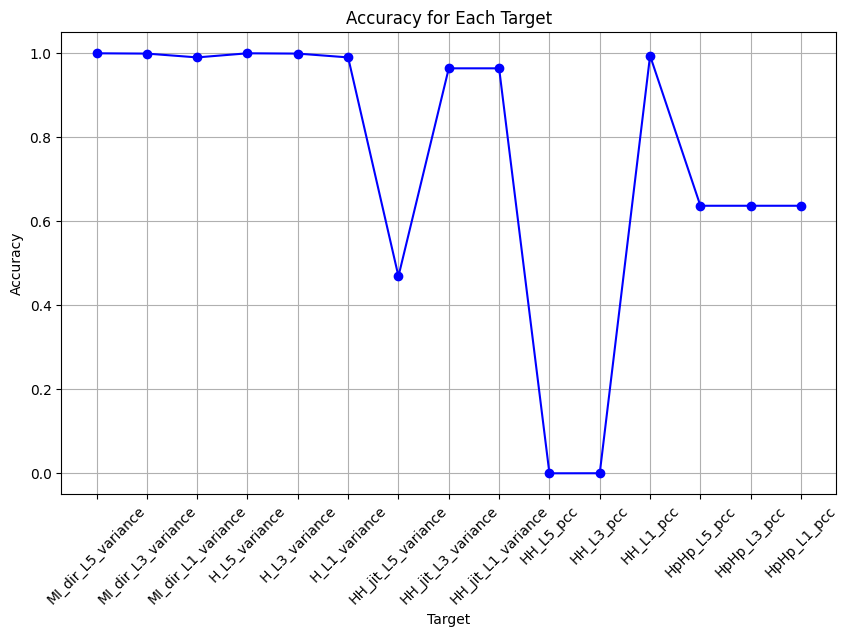

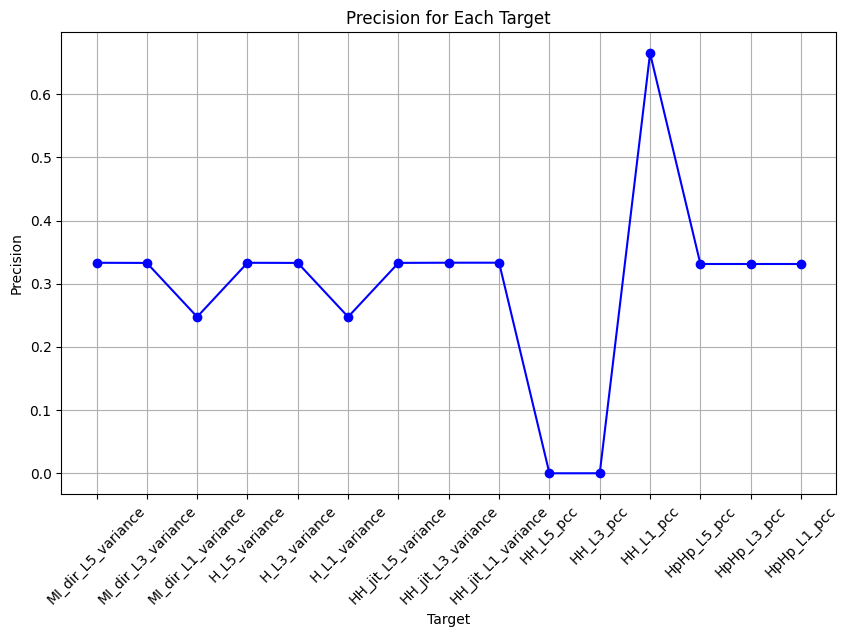

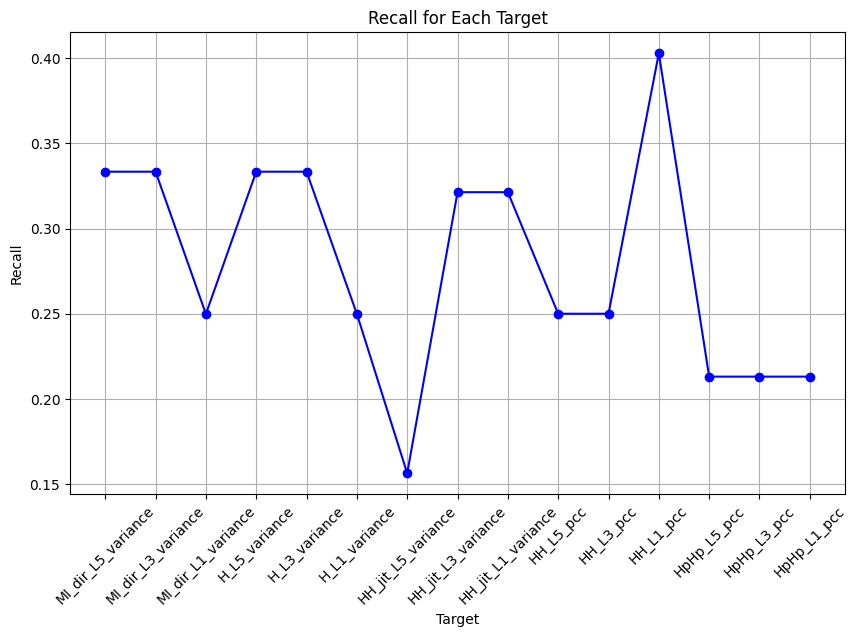

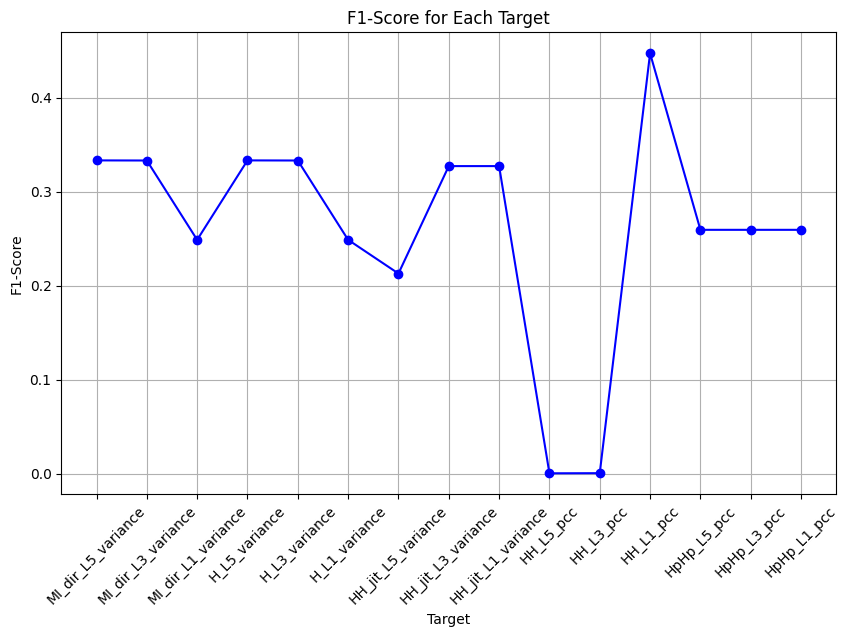

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Discretize the continuous predictions into bins
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.9997549  0.9995098  0.99975484 0.99975484 0.99975484]
Mean Cross-Validation Accuracy: 0.9997058463002755
Validation Set Performance:
Accuracy: 0.9992156862745099
Precision: 0.3330718954248366
Recall: 0.3333333333333333
F1-Score: 0.3332025630966392
Test Set Performance:
Accuracy: 0.99952935639487
Precision: 0.33317645213162334
Recall: 0.3333333333333333
F1-Score: 0.33325487426934997

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9995098  0.99926471 0.99950968 0.99950968 0.99950968]
Mean Cross-Validation Accuracy: 0.9994607122083939
Validation Set Performance:
Accuracy: 0.9982352941176471
Precision: 0.3327450980392157
Recall: 0.3333333333333333
F1-Score: 0.33303895594151706
Test Set Performance:
Accuracy: 0.998823390987175
Precision: 0.3329411303290583
Recall: 0.3333333333333333
F1-Score: 0.33313711639588733

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99191176 0.99044118 0.99141947 0.99166462 0.99019367]
Mean Cross-Validation Accuracy: 0.9911261410668706
Validation Set Performance:
Accuracy: 0.9911764705882353
Precision: 0.4357311320754717
Recall: 0.27485163204747776
F1-Score: 0.2931563929919794
Test Set Performance:
Accuracy: 0.9902341451935521
Precision: 0.3480825958702065
Recall: 0.2824007830942554
F1-Score: 0.2981147346886488

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9997549  0.9995098  0.99975484 0.99975484 0.99975484]
Mean Cross-Validation Accuracy: 0.9997058463002755
Validation Set Performance:
Accuracy: 0.9992156862745099
Precision: 0.3330718954248366
Recall: 0.3333333333333333
F1-Score: 0.3332025630966392
Test Set Performance:
Accuracy: 0.99952935639487
Precision: 0.33317645213162334
Recall: 0.3333333333333333
F1-Score: 0.33325487426934997

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9995098  0.99926471 0.99950968 0.99950968 0.99950968]
Mean Cross-Validation Accuracy: 0.9994607122083939
Validation Set Performance:
Accuracy: 0.9982352941176471
Precision: 0.3327450980392157
Recall: 0.3333333333333333
F1-Score: 0.33303895594151706
Test Set Performance:
Accuracy: 0.998823390987175
Precision: 0.3329411303290583
Recall: 0.3333333333333333
F1-Score: 0.33313711639588733

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99191176 0.99044118 0.99141947 0.99166462 0.99019367]
Mean Cross-Validation Accuracy: 0.9911261410668706
Validation Set Performance:
Accuracy: 0.9911764705882353
Precision: 0.4357311320754717
Recall: 0.27485163204747776
F1-Score: 0.2931563929919794
Test Set Performance:
Accuracy: 0.9902341451935521
Precision: 0.3480825958702065
Recall: 0.2824007830942554
F1-Score: 0.2981147346886488

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9997549  1.         1.         0.99975484 0.99975484]
Mean Cross-Validation Accuracy: 0.9998529171413602
Validation Set Performance:
Accuracy: 0.9990196078431373
Precision: 0.33326792255363685
Recall: 0.3330718441524482
F1-Score: 0.33316985450384173
Test Set Performance:
Accuracy: 0.9992940345923049
Precision: 0.3333333333333333
Recall: 0.33325485579752795
F1-Score: 0.33329408994584414

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [1.        0.9997549 1.        1.        1.       ]
Mean Cross-Validation Accuracy: 0.9999509803921569
Validation Set Performance:
Accuracy: 0.9998039215686274
Precision: 0.4999019607843137
Recall: 0.5
F1-Score: 0.49995097558584173
Test Set Performance:
Accuracy: 0.9998823390987175
Precision: 0.49994116954935874
Recall: 0.5
F1-Score: 0.4999705830440666

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.        0.9997549 1.        1.        1.       ]
Mean Cross-Validation Accuracy: 0.9999509803921569
Validation Set Performance:
Accuracy: 0.9998039215686274
Precision: 0.4999019607843137
Recall: 0.5
F1-Score: 0.49995097558584173
Test Set Performance:
Accuracy: 0.9998823390987175
Precision: 0.49994116954935874
Recall: 0.5
F1-Score: 0.4999705830440666

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9997549 0.9997549 1.        1.        1.       ]
Mean Cross-Validation Accuracy: 0.9999019607843138
Validation Set Performance:
Accuracy: 0.000196078431372549
Precision: 6.5359477124183e-05
Recall: 0.3333333333333333
F1-Score: 0.0001306933281056002
Test Set Performance:
Accuracy: 0.00023532180256500765
Precision: 7.844060085500255e-05
Recall: 0.3333333333333333
F1-Score: 0.0001568442928282947

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9997549  0.9997549  0.99975484 0.99975484 0.99975484]
Mean Cross-Validation Accuracy: 0.9997548659081186
Validation Set Performance:
Accuracy: 0.000196078431372549
Precision: 6.5359477124183e-05
Recall: 0.3333333333333333
F1-Score: 0.0001306933281056002
Test Set Performance:
Accuracy: 0.00035298270384751147
Precision: 0.00011766090128250382
Recall: 0.3333333333333333
F1-Score: 0.00023523876734885907

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99901961 0.99901961 0.99901937 0.99877421 0.99901937]
Mean Cross-Validation Accuracy: 0.9989704320070759
Validation Set Performance:
Accuracy: 0.9974509803921568
Precision: 0.4996057559629411
Recall: 0.5
F1-Score: 0.49980272243045964
Test Set Performance:
Accuracy: 0.9971761383692199
Precision: 0.499409053303392
Recall: 0.5
F1-Score: 0.499704177020471

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9997549  0.9997549  0.99975484 0.99975484 1.        ]
Mean Cross-Validation Accuracy: 0.9998038975335171
Validation Set Performance:
Accuracy: 0.004313725490196078
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1-Score: 0.3333333333333333
Test Set Performance:
Accuracy: 0.00400047064360513
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1-Score: 0.3333333333333333

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9997549  0.9997549  0.99975484 0.99975484 1.        ]
Mean Cross-Validation Accuracy: 0.9998038975335171
Validation Set Performance:
Accuracy: 0.004313725490196078
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1-Score: 0.3333333333333333
Test Set Performance:
Accuracy: 0.00400047064360513
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1-Score: 0.3333333333333333

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9997549  0.9997549  0.99975484 0.99975484 1.        ]
Mean Cross-Validation Accuracy: 0.9998038975335171
Validation Set Performance:
Accuracy: 0.004313725490196078
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1-Score: 0.3333333333333333
Test Set Performance:
Accuracy: 0.00400047064360513
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1-Score: 0.3333333333333333

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.6657332235164921
Average Precision: 0.32408141225995707
Average Recall: 0.3598704281324025
Average F1-Score: 0.31748966445482646


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

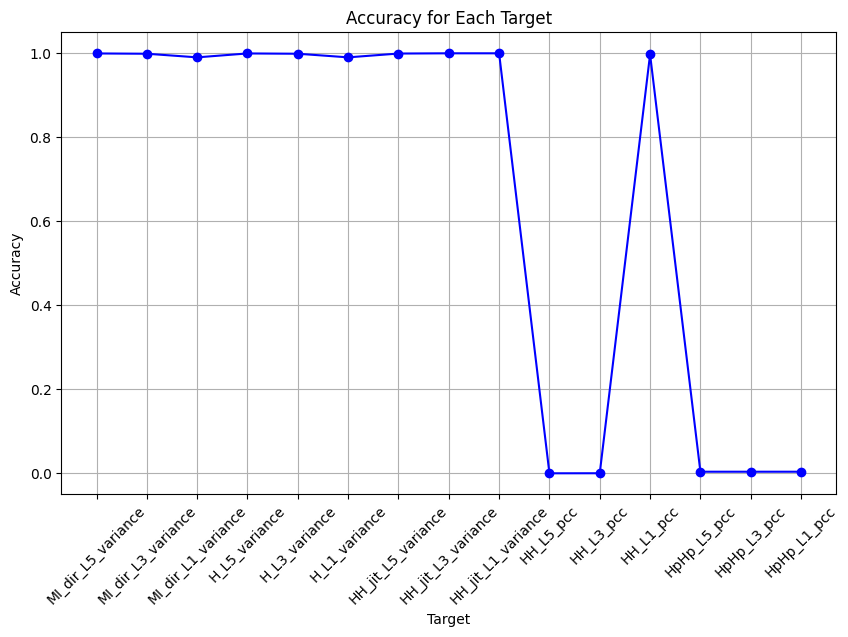

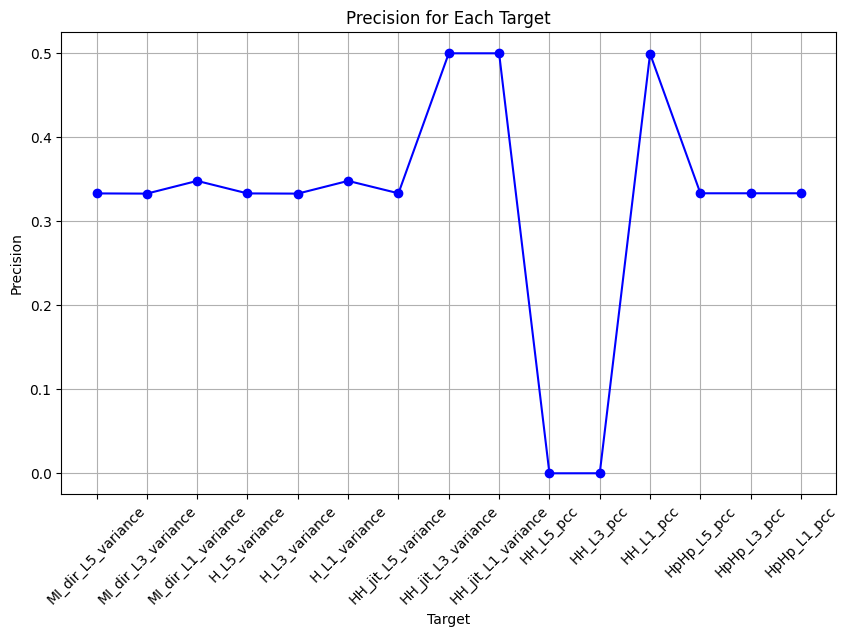

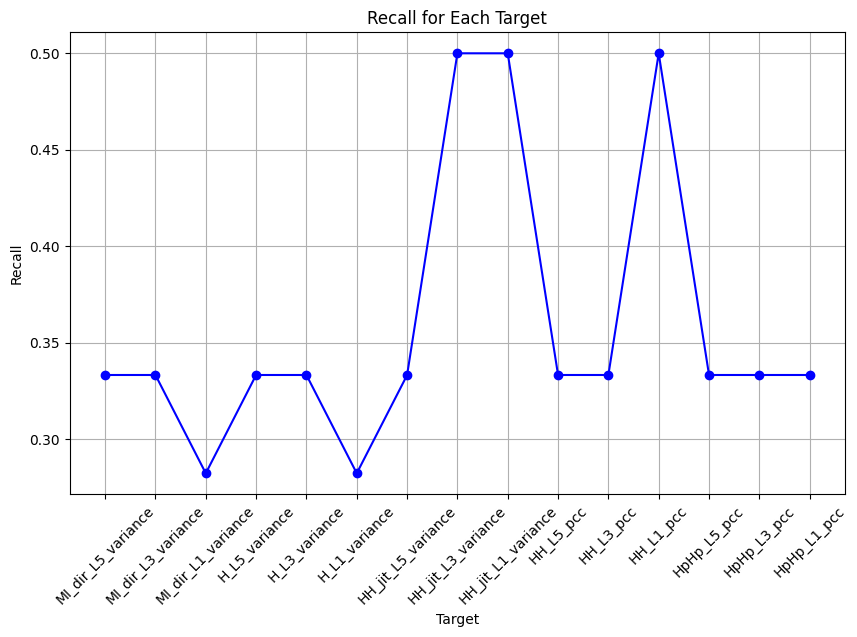

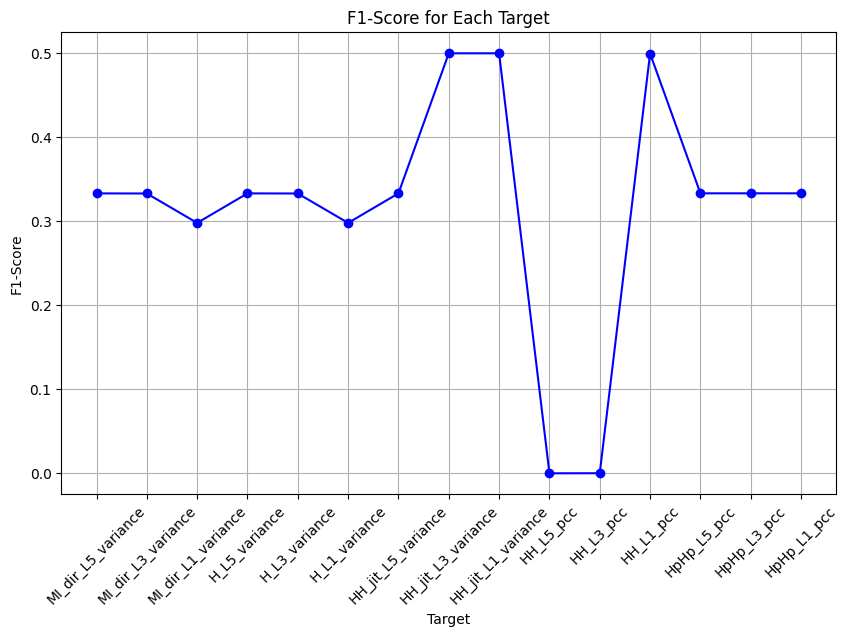

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    knn_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = knn_model.predict(X_valid)
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = knn_model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.92573529 0.55759804 0.92718804 0.95047806 0.92203972]
Mean Cross-Validation Accuracy: 0.8566078287161887
Validation Set Performance:
Accuracy: 0.9343137254901961
Precision: 0.33419445463087927
Recall: 0.6449502878074306
F1-Score: 0.3240402180834033
Test Set Performance:
Accuracy: 0.9332862689728203
Precision: 0.33446916046662173
Recall: 0.644496762801648
F1-Score: 0.3241948954165759

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.5752451  0.9254902  0.55699926 0.93576857 0.55283158]
Mean Cross-Validation Accuracy: 0.7092669411476283
Validation Set Performance:
Accuracy: 0.9235294117647059
Precision: 0.334706817251515
Recall: 0.4415897335166634
F1-Score: 0.3235514985445334
Test Set Performance:
Accuracy: 0.9176373691022474
Precision: 0.33459711339194836
Recall: 0.5061216476224133
F1-Score: 0.32191913197499783

--------

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to s

Cross-Validation Accuracy Scores: [0.01838235 0.92156863 0.92841383 0.93135572 0.91787203]
Mean Cross-Validation Accuracy: 0.743518511842099
Validation Set Performance:
Accuracy: 0.9286274509803921
Precision: 0.3511862735705809
Recall: 0.4119683481701286
F1-Score: 0.34237497994169397
Test Set Performance:
Accuracy: 0.9284621720202377
Precision: 0.3410232569729647
Recall: 0.46001698502589555
F1-Score: 0.33973731440691796

--------------------------------------------------

Training model for target: H_L5_variance
Cross-Validation Accuracy Scores: [0.92573529 0.55759804 0.92718804 0.95047806 0.92203972]
Mean Cross-Validation Accuracy: 0.8566078287161887
Validation Set Performance:
Accuracy: 0.9343137254901961
Precision: 0.33419445463087927
Recall: 0.6449502878074306
F1-Score: 0.3240402180834033
Test Set Performance:
Accuracy: 0.9332862689728203
Precision: 0.33446916046662173
Recall: 0.644496762801648
F1-Score: 0.3241948954165759

--------------------------------------------------

Traini

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/l

Validation Set Performance:
Accuracy: 0.9235294117647059
Precision: 0.334706817251515
Recall: 0.4415897335166634
F1-Score: 0.3235514985445334
Test Set Performance:
Accuracy: 0.9176373691022474
Precision: 0.33459711339194836
Recall: 0.5061216476224133
F1-Score: 0.32191913197499783

--------------------------------------------------

Training model for target: H_L1_variance
Cross-Validation Accuracy Scores: [0.01838235 0.92156863 0.92841383 0.93135572 0.91787203]
Mean Cross-Validation Accuracy: 0.743518511842099
Validation Set Performance:
Accuracy: 0.9286274509803921
Precision: 0.3511862735705809
Recall: 0.4119683481701286
F1-Score: 0.34237497994169397
Test Set Performance:
Accuracy: 0.9284621720202377
Precision: 0.3410232569729647
Recall: 0.46001698502589555
F1-Score: 0.33973731440691796

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.99975484]
Mean Cross-

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Accuracy: 0.9990196078431373
Precision: 0.49990188383045525
Recall: 0.4996077662286723
F1-Score: 0.4997547817557626
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Cross-Validation Accuracy Scores: [0.75955882 0.9997549  0.74724197 0.76121598 0.75042903]
Mean Cross-Validation Accuracy: 0.8036401415187304
Validation Set Performance:
Accuracy: 0.7490196078431373
Precision: 0.5003903200624512
Recall: 0.8744851931751324
F1-Score: 0.4290150614770947
Test Set Performance:
Accuracy: 0.7556183080362395
Precision: 0.5002406159769008
Recall: 0.8777947752412332
F1-Score: 0.4308717773427205

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.75955882 0.9997549  0.74724197 0.76121598 0.75042903]
Mean Cross-Validation Accuracy: 0.8036401415187304


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to s

Validation Set Performance:
Accuracy: 0.7490196078431373
Precision: 0.5003903200624512
Recall: 0.8744851931751324
F1-Score: 0.4290150614770947
Test Set Performance:
Accuracy: 0.7556183080362395
Precision: 0.5002406159769008
Recall: 0.8777947752412332
F1-Score: 0.4308717773427205

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.9997549  0.9997549  1.         1.         0.99901937]
Mean Cross-Validation Accuracy: 0.9997058342827202
Validation Set Performance:
Accuracy: 0.000392156862745098
Precision: 0.11117650905761557
Recall: 0.6666666666666666
F1-Score: 0.1667974369033608
Test Set Performance:
Accuracy: 0.00023532180256500765
Precision: 7.84960163271714e-05
Recall: 0.3333333333333333
F1-Score: 0.00015695507161075144

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.94583333 0.94754902 0.99509684 0.99975484 0.99264526]
Mean Cross-Val

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The 

Validation Set Performance:
Accuracy: 0.000588235294117647
Precision: 0.002703817174444456
Recall: 0.5555555555555555
F1-Score: 0.005345847084708471
Test Set Performance:
Accuracy: 0.0004706436051300153
Precision: 0.0009211952268765195
Recall: 0.4444444444444444
F1-Score: 0.001830933550843616

--------------------------------------------------

Training model for target: HH_L1_pcc
Cross-Validation Accuracy Scores: [0.99387255 0.99264706 0.99509684 0.99190978 0.995342  ]
Mean Cross-Validation Accuracy: 0.9937736445399439
Validation Set Performance:
Accuracy: 0.9954901960784314
Precision: 0.7351198331008306
Recall: 0.8810997820869488
F1-Score: 0.7947604068809495
Test Set Performance:
Accuracy: 0.9944699376397224
Precision: 0.6926431073199519
Recall: 0.8360361579374868
F1-Score: 0.7518845766606607

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.99681373 0.99705882 0.99754842 0.99656779 0.99730326]
Mean Cross-

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Accuracy: 0.9984313725490196
Precision: 0.8749014195583595
Recall: 0.9765834795373984
F1-Score: 0.9196059113300492
Test Set Performance:
Accuracy: 0.99764678197435
Precision: 0.8172484996949303
Recall: 0.9841718494840346
F1-Score: 0.8831296341114606

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Cross-Validation Accuracy Scores: [0.99681373 0.99705882 0.99754842 0.99656779 0.99730326]
Mean Cross-Validation Accuracy: 0.9970584029149784
Validation Set Performance:
Accuracy: 0.9984313725490196
Precision: 0.8749014195583595
Recall: 0.9765834795373984
F1-Score: 0.9196059113300492
Test Set Performance:
Accuracy: 0.99764678197435
Precision: 0.8172484996949303
Recall: 0.9841718494840346
F1-Score: 0.8831296341114606

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Cross-Validation Accuracy Scores: [0.99681373 0.99705882 0.99754842 0.99656779 0.99730326]
Mean Cross-Validation Accuracy: 0.9970584029149784
Vali

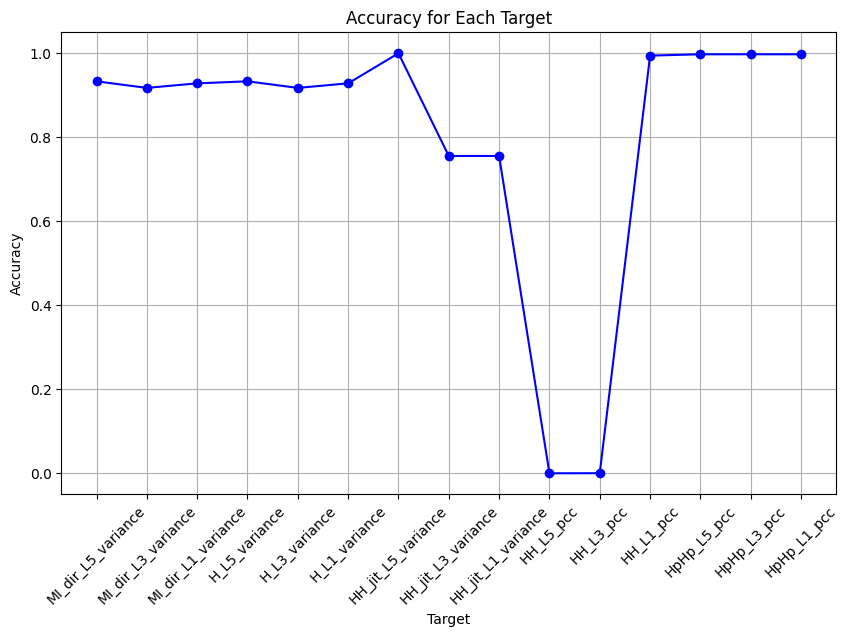

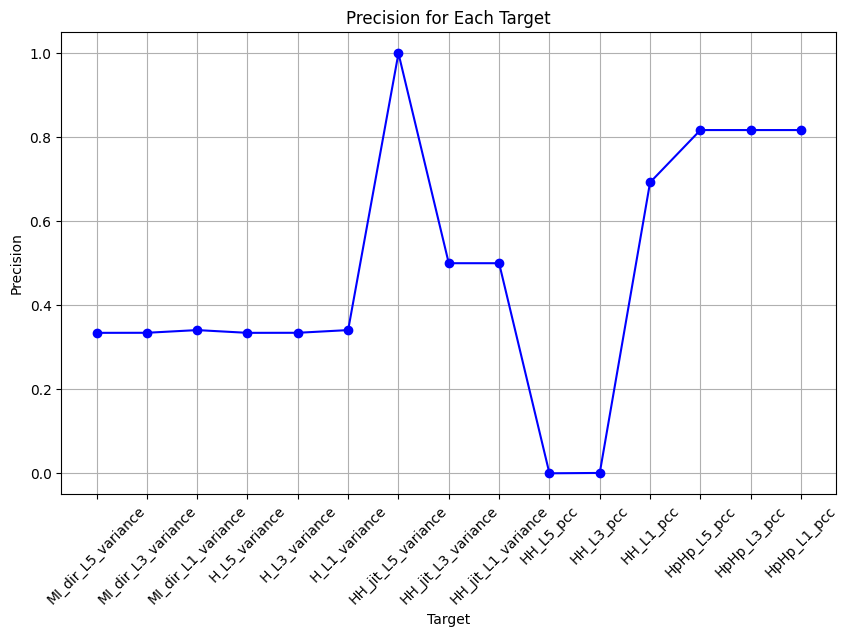

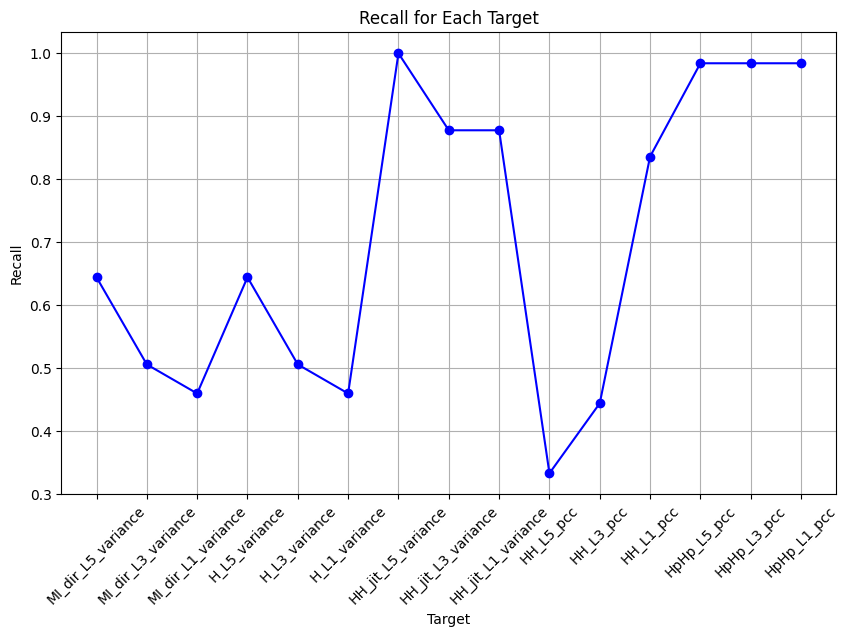

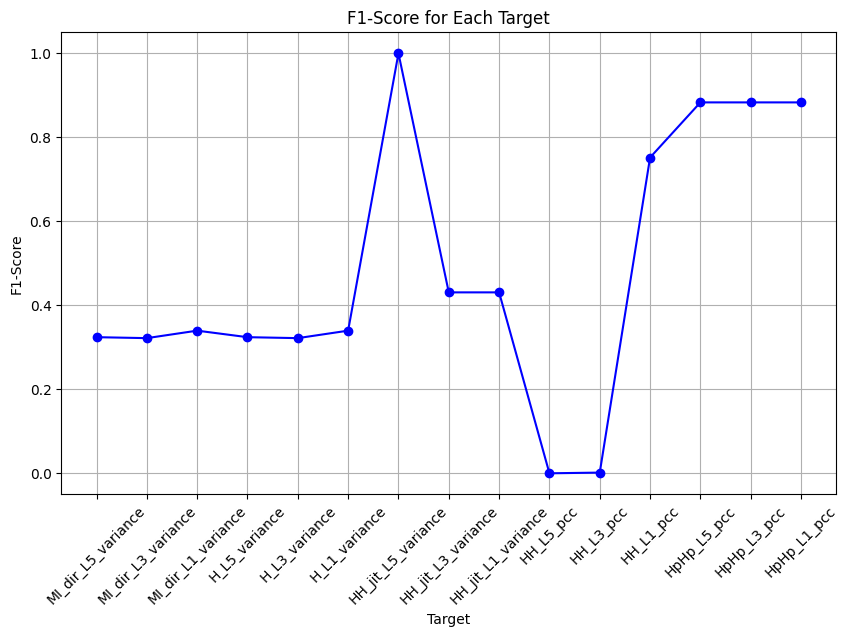

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(nb_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    nb_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = nb_model.predict(X_valid)
    y_valid_pred_binned = bin_targets(pd.DataFrame(y_valid_pred, columns=[target]))

    # Predict on the test set
    y_test_pred = nb_model.predict(X_test)
    y_test_pred_binned = bin_targets(pd.DataFrame(y_test_pred, columns=[target]))

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned[target])
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned[target])
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.9997549  0.99901961 0.99975484 0.99975484 0.99975484]
Mean Cross-Validation Accuracy: 0.9996078070845892
Validation Set Performance:
Accuracy: 0.9992156862745099
Precision: 0.3330718954248366
Recall: 0.3333333333333333
F1-Score: 0.3332025630966392
Test Set Performance:
Accuracy: 0.9994116954935874
Precision: 0.6665489642184558
Recall: 0.49992152246419463
F1-Score: 0.5554574644092624

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.9995098  0.99828431 0.99926453 0.99950968 0.99926453]
Mean Cross-Validation Accuracy: 0.9991665705262246
Validation Set Performance:
Accuracy: 0.9978431372549019
Precision: 0.33281014976129747
Recall: 0.33320238329077456
F1-Score: 0.33300615102735237
Test Set Performance:
Accuracy: 0.9987057300858925
Precision: 0.4759549326738115
Recall: 0.5331762673263439
F1-Score: 0.49980369061641144

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Cross-Validation Accuracy Scores: [0.99215686 0.98946078 0.99141947 0.9924001  0.98994852]
Mean Cross-Validation Accuracy: 0.991077145494138
Validation Set Performance:
Accuracy: 0.9913725490196078
Precision: 0.5809102815979044
Recall: 0.36653478404220247
F1-Score: 0.3908754433266653
Test Set Performance:
Accuracy: 0.9916460760089423
Precision: 0.6770397613139548
Recall: 0.494852262989728
F1-Score: 0.5502349648007805

--------------------------------------------------

T

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9995098  0.99828431 0.99926453 0.99950968 0.99926453]
Mean Cross-Validation Accuracy: 0.9991665705262246
Validation Set Performance:
Accuracy: 0.9978431372549019
Precision: 0.33281014976129747
Recall: 0.33320238329077456
F1-Score: 0.33300615102735237
Test Set Performance:
Accuracy: 0.9987057300858925
Precision: 0.4759549326738115
Recall: 0.5331762673263439
F1-Score: 0.49980369061641144

--------------------------------------------------

Training model for target: H_L1_variance
Cross-Validation Accuracy Scores: [0.99215686 0.98946078 0.99141947 0.9924001  0.98994852]
Mean Cross-Validation Accuracy: 0.991077145494138
Validation Set Performance:
Accuracy: 0.9913725490196078
Precision: 0.5809102815979044
Recall: 0.36653478404220247
F1-Score: 0.3908754433266653
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9916460760089423
Precision: 0.6770397613139548
Recall: 0.494852262989728
F1-Score: 0.5502349648007805

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 0.9992156862745099
Precision: 0.4999019030802433
Recall: 0.4997058246715042
F1-Score: 0.49980384464495886
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Cross-Validation Accuracy Scores: [1.        0.9997549 1.        1.        1.       ]
Mean Cross-Validation Accuracy: 0.9999509803921569
Validation Set Performance:
Accuracy: 0.9998039215686274
Precision: 0.4999019607843137
Recall: 0.5
F1-Score: 0.49995097558584173
Test Set Performance:
Accuracy: 0.9998823390987175
Precision: 0.49994116954935874
Recall: 0.5
F1-Score: 0.49997058

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/pytho

Cross-Validation Accuracy Scores: [1.        0.9997549 1.        1.        1.       ]
Mean Cross-Validation Accuracy: 0.9999509803921569
Validation Set Performance:
Accuracy: 0.9998039215686274
Precision: 0.4999019607843137
Recall: 0.5
F1-Score: 0.49995097558584173
Test Set Performance:
Accuracy: 0.9998823390987175
Precision: 0.49994116954935874
Recall: 0.5
F1-Score: 0.4999705830440666

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.99926471 0.9995098  1.         0.99975484 1.        ]
Mean Cross-Validation Accuracy: 0.9997058703353859
Validation Set Performance:
Accuracy: 0.000196078431372549
Precision: 6.5359477124183e-05
Recall: 0.3333333333333333
F1-Score: 0.0001306933281056002
Test Set Performance:
Accuracy: 0.00023532180256500765
Precision: 7.844060085500255e-05
Recall: 0.3333333333333333
F1-Score: 0.0001568442928282947

--------------------------------------------------

Training model for target: HH_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Cross-Validation Accuracy Scores: [0.99926471 0.9997549  0.99975484 0.99975484 0.99950968]
Mean Cross-Validation Accuracy: 0.9996077950670339
Validation Set Performance:
Accuracy: 0.000196078431372549
Precision: 6.5359477124183e-05
Recall: 0.3333333333333333
F1-Score: 0.0001306933281056002
Test Set Performance:
Accuracy: 0.0004706436051300153
Precision: 0.3334510080803326
Recall: 0.33337258134149694
F1-Score: 0.0003137532142208582

--------------------------------------------------

Training model for target: HH_L1_pcc
Cross-Validation Accuracy Scores: [0.99877451 0.99901961 0.99950968 0.99975484 0.99901937]
Mean Cross-Validation Accuracy: 0.999215602151623
Validation Set Performance:
Accuracy: 0.9990196078431373
Precision: 0.9996712689020382
Recall: 0.8717948717948718
F1-Score: 0.9204704739978543
Test Set Performance:
Accuracy: 0.9983527473820449
Precision: 0.9994480583481176
Recall: 0.8055555555555555
F1-Score: 0.8624688985442662

--------------------------------------------------

T

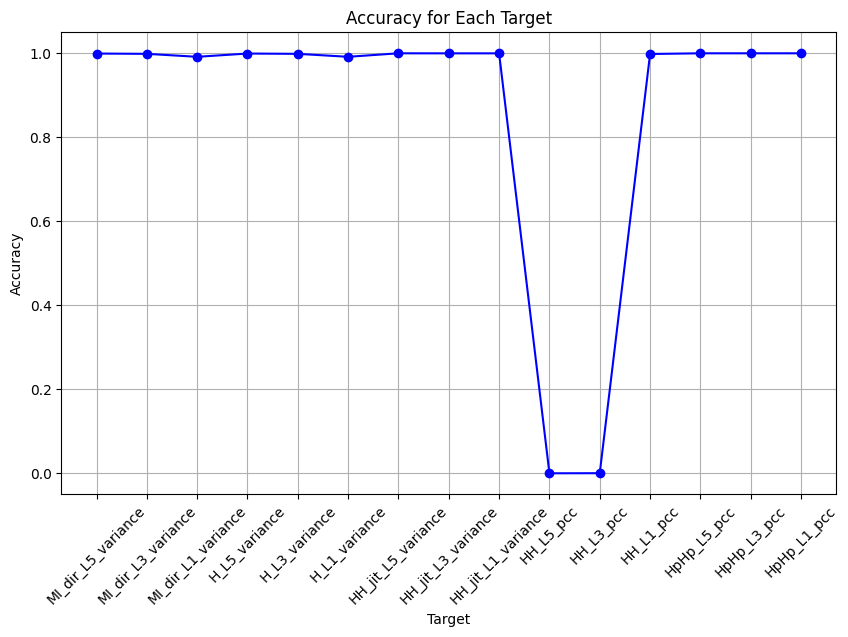

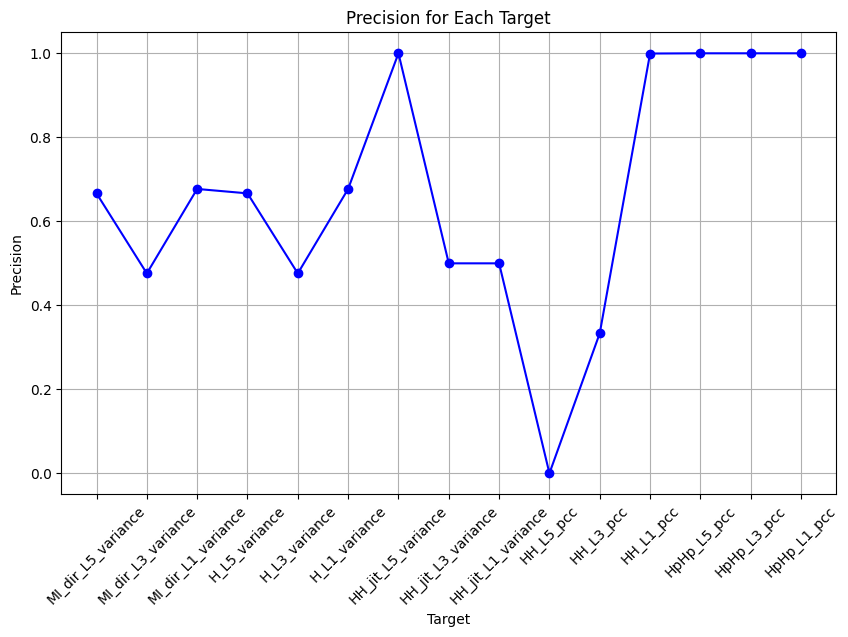

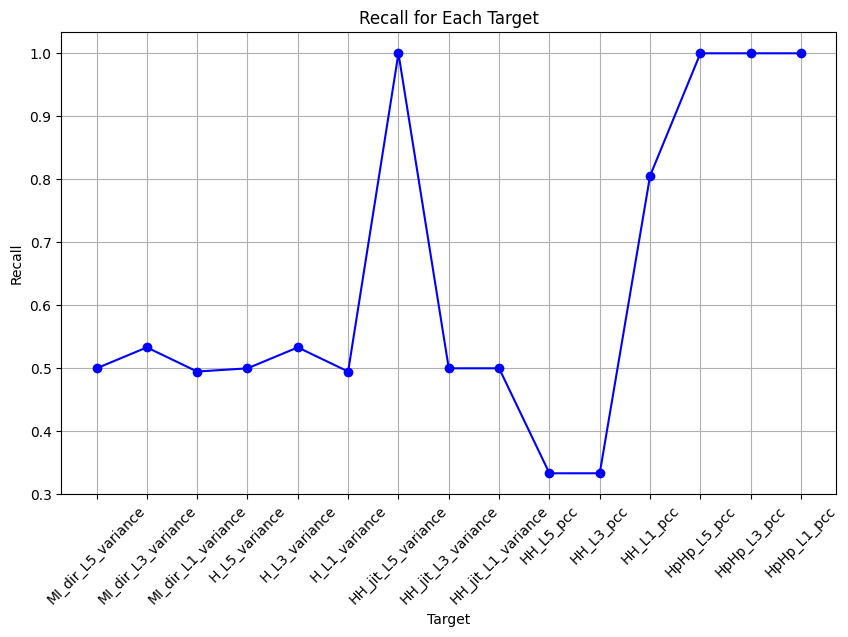

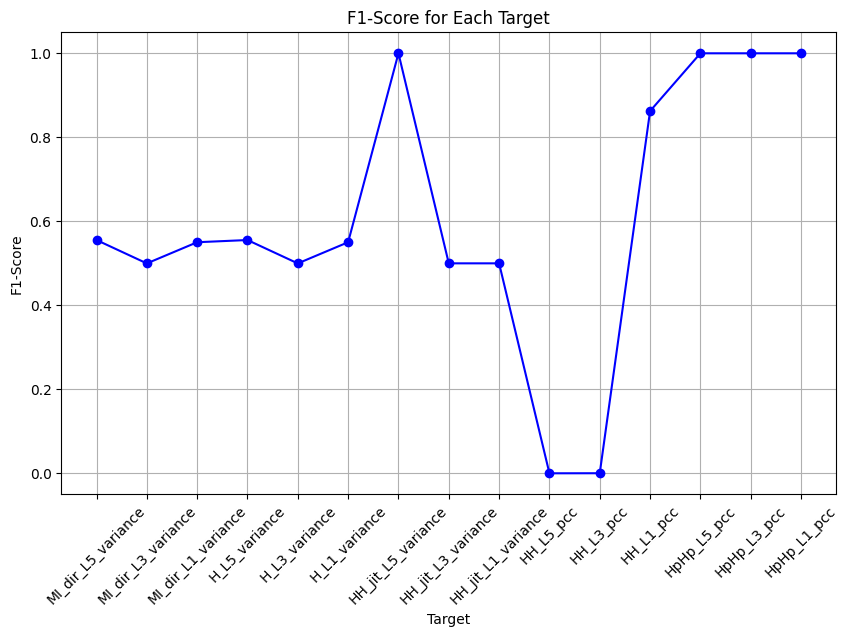

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Ensure target_columns is defined and not empty
if 'target_columns' in locals() and target_columns:
    # Train and evaluate the model for each target column
    for target in target_columns:
        print(f"Training model for target: {target}")

        # Initialize the Decision Tree model
        rf_model = DecisionTreeClassifier(random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

        # Train the model on the full training set
        rf_model.fit(X_train, y_train_binned[target])

        # Predict on the validation set
        y_valid_pred = rf_model.predict(X_valid)

        # Predict on the test set
        y_test_pred = rf_model.predict(X_test)

        # Generate classification performance metrics
        def generate_classification_metrics(y_true, y_pred):
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average='macro')
            recall = recall_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
            return accuracy, precision, recall, f1

        print("Validation Set Performance:")
        val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
        print(f"Accuracy: {val_accuracy}")
        print(f"Precision: {val_precision}")
        print(f"Recall: {val_recall}")
        print(f"F1-Score: {val_f1}")

        print("Test Set Performance:")
        test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
        print(f"Accuracy: {test_accuracy}")
        print(f"Precision: {test_precision}")
        print(f"Recall: {test_recall}")
        print(f"F1-Score: {test_f1}")

        print("\n" + "-"*50 + "\n")

        # Append metrics to overall lists
        overall_accuracy.append(test_accuracy)
        overall_precision.append(test_precision)
        overall_recall.append(test_recall)
        overall_f1.append(test_f1)

    # Calculate the overall performance metrics
    avg_accuracy = np.mean(overall_accuracy)
    avg_precision = np.mean(overall_precision)
    avg_recall = np.mean(overall_recall)
    avg_f1 = np.mean(overall_f1)

    print("Overall Performance on Test Set:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1-Score: {avg_f1}")

    # Define the plot_metrics function
    def plot_metrics(metrics, metric_name):
        plt.figure(figsize=(10, 6))
        plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
        plt.title(f'{metric_name} for Each Target')
        plt.xlabel('Target')
        plt.ylabel(metric_name)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # Plotting
    plot_metrics(overall_accuracy, 'Accuracy')
    plot_metrics(overall_precision, 'Precision')
    plot_metrics(overall_recall, 'Recall')
    plot_metrics(overall_f1, 'F1-Score')
else:
    print("Error: target_columns is not defined or is empty.")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.9997549  0.99926471 0.99975484 0.99975484 0.99975484]
Mean Cross-Validation Accuracy: 0.9996568266924323
Validation Set Performance:
Accuracy: 0.9992156862745099
Precision: 0.3330718954248366
Recall: 0.3333333333333333
F1-Score: 0.3332025630966392
Test Set Performance:
Accuracy: 0.9994116954935874
Precision: 0.33317643367066757
Recall: 0.33329409456543063
F1-Score: 0.3332352537319288

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9995098  0.99926471 0.99975484 0.99950968 0.99950968]
Mean Cross-Validation Accuracy: 0.9995097438337923
Validation Set Performance:
Accuracy: 0.9982352941176471
Precision: 0.332810354971563
Recall: 0.3333333333333333
F1-Score: 0.333071638861629
Test Set Performance:
Accuracy: 0.998823390987175
Precision: 0.49964693421207484
Recall: 0.3999607334982527
F1-Score: 0.4283751885306107

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99289216 0.99044118 0.99166462 0.99264526 0.99117431]
Mean Cross-Validation Accuracy: 0.9917635041268283
Validation Set Performance:
Accuracy: 0.9913725490196078
Precision: 0.5808452825247169
Recall: 0.36653478404220247
F1-Score: 0.39084271595490155
Test Set Performance:
Accuracy: 0.9914107542063773
Precision: 0.6920446647520883
Recall: 0.4486747738693852
F1-Score: 0.5070307874481942

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9997549  0.99926471 0.99975484 0.99975484 0.99975484]
Mean Cross-Validation Accuracy: 0.9996568266924323
Validation Set Performance:
Accuracy: 0.9992156862745099
Precision: 0.3330718954248366
Recall: 0.3333333333333333
F1-Score: 0.3332025630966392
Test Set Performance:
Accuracy: 0.9994116954935874
Precision: 0.33317643367066757
Recall: 0.33329409456543063
F1-Score: 0.3332352537319288

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9995098  0.99926471 0.99975484 0.99950968 0.99950968]
Mean Cross-Validation Accuracy: 0.9995097438337923
Validation Set Performance:
Accuracy: 0.9982352941176471
Precision: 0.332810354971563
Recall: 0.3333333333333333
F1-Score: 0.333071638861629
Test Set Performance:
Accuracy: 0.998823390987175
Precision: 0.49964693421207484
Recall: 0.3999607334982527
F1-Score: 0.4283751885306107

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99289216 0.99044118 0.99166462 0.99264526 0.99117431]
Mean Cross-Validation Accuracy: 0.9917635041268283
Validation Set Performance:
Accuracy: 0.9913725490196078
Precision: 0.5808452825247169
Recall: 0.36653478404220247
F1-Score: 0.39084271595490155
Test Set Performance:
Accuracy: 0.9914107542063773
Precision: 0.6920446647520883
Recall: 0.4486747738693852
F1-Score: 0.5070307874481942

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [1.         1.         1.         0.99975484 1.        ]
Mean Cross-Validation Accuracy: 0.9999509683746016
Validation Set Performance:
Accuracy: 0.9992156862745099
Precision: 0.4999019030802433
Recall: 0.4997058246715042
F1-Score: 0.49980384464495886
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.        0.9997549 1.        1.        1.       ]
Mean Cross-Validation Accuracy: 0.9999509803921569
Validation Set Performance:
Accuracy: 0.9998039215686274
Precision: 0.4999019607843137
Recall: 0.5
F1-Score: 0.49995097558584173
Test Set Performance:
Accuracy: 0.9998823390987175
Precision: 0.49994116954935874
Recall: 0.5
F1-Score: 0.4999705830440666

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.        0.9997549 1.        1.        1.       ]
Mean Cross-Validation Accuracy: 0.9999509803921569
Validation Set Performance:
Accuracy: 0.9998039215686274
Precision: 0.4999019607843137
Recall: 0.5
F1-Score: 0.49995097558584173
Test Set Performance:
Accuracy: 0.9998823390987175
Precision: 0.49994116954935874
Recall: 0.5
F1-Score: 0.4999705830440666

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9997549 0.9997549 1.        1.        1.       ]
Mean Cross-Validation Accuracy: 0.9999019607843138
Validation Set Performance:
Accuracy: 0.000196078431372549
Precision: 6.5359477124183e-05
Recall: 0.3333333333333333
F1-Score: 0.0001306933281056002
Test Set Performance:
Accuracy: 0.00023532180256500765
Precision: 7.844060085500255e-05
Recall: 0.3333333333333333
F1-Score: 0.0001568442928282947

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9997549  0.9997549  0.99975484 0.99975484 0.99950968]
Mean Cross-Validation Accuracy: 0.9997058342827202
Validation Set Performance:
Accuracy: 0.000196078431372549
Precision: 6.5359477124183e-05
Recall: 0.3333333333333333
F1-Score: 0.0001306933281056002
Test Set Performance:
Accuracy: 0.0005883045064125191
Precision: 0.33345102192930837
Recall: 0.5555555555555555
F1-Score: 0.2669019607843138

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99877451 0.99901961 0.99950968 0.99901937 0.99901937]
Mean Cross-Validation Accuracy: 0.999068507275428
Validation Set Performance:
Accuracy: 0.9990196078431373
Precision: 0.9996712689020382
Recall: 0.8717948717948718
F1-Score: 0.9204704739978543
Test Set Performance:
Accuracy: 0.9979997646781974
Precision: 0.9993300228580436
Recall: 0.7679738562091504
F1-Score: 0.8280228833935536

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.9995098  0.9997549  0.99975484 0.99975484 0.99975484]
Mean Cross-Validation Accuracy: 0.9997058463002755
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.9998823390987175
Precision: 0.9999409402315143
Recall: 0.9852941176470589
F1-Score: 0.9925077818044619

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Cross-Validation Accuracy Scores:

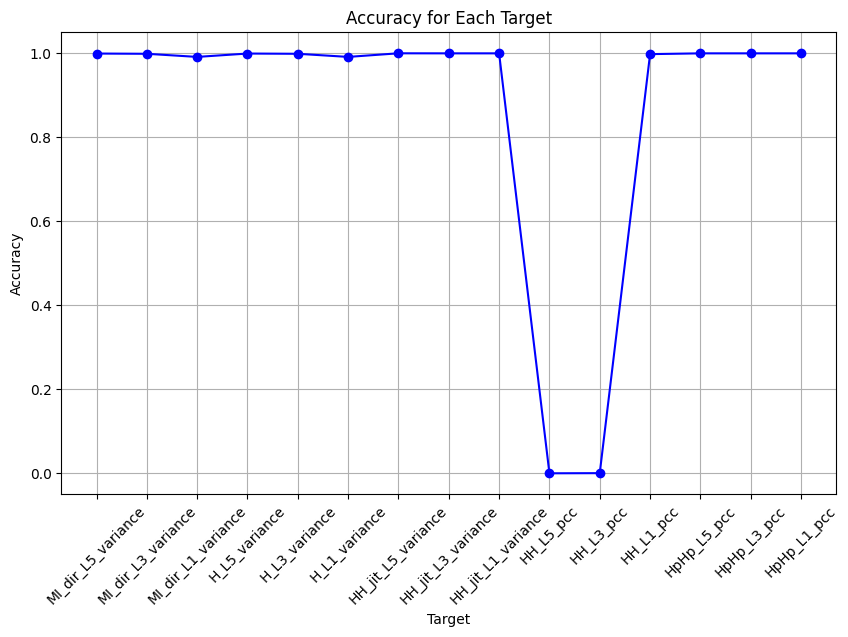

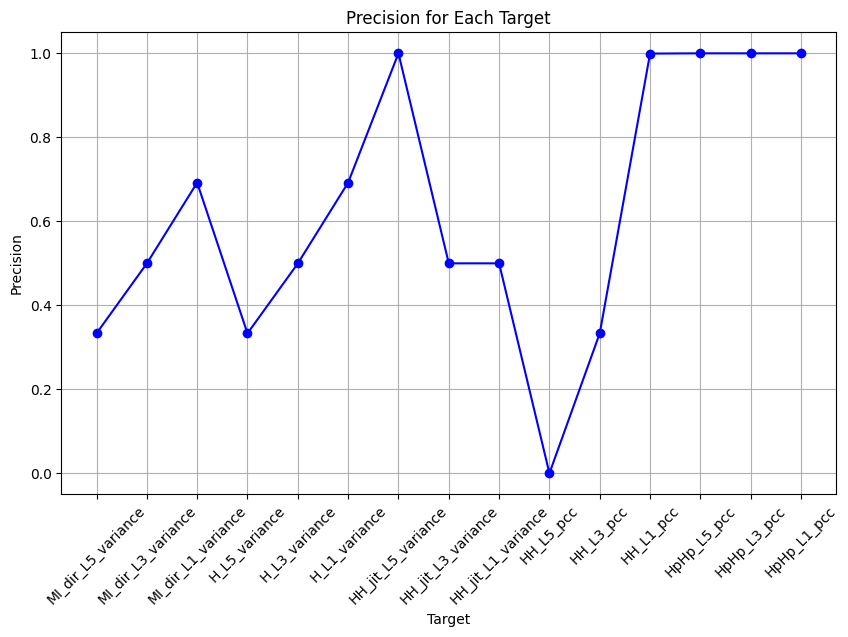

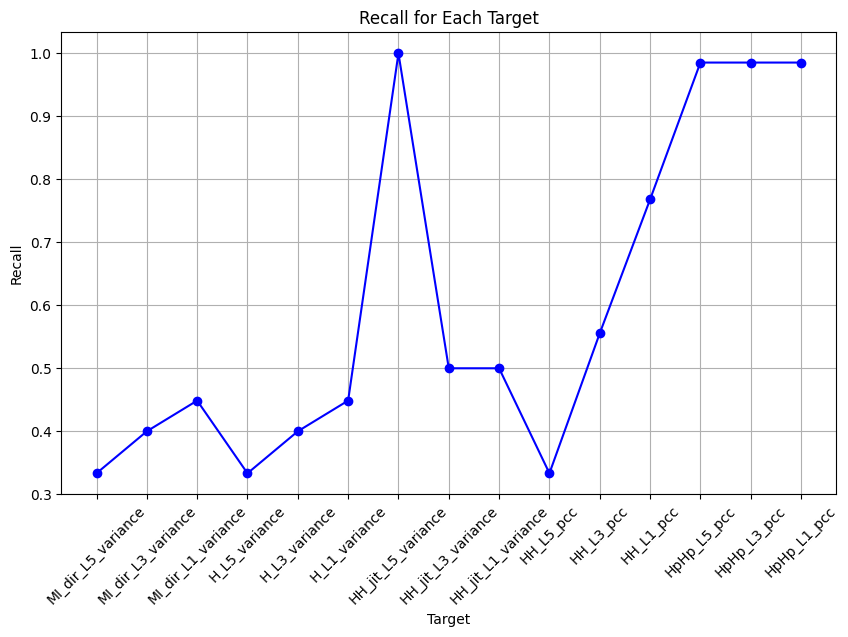

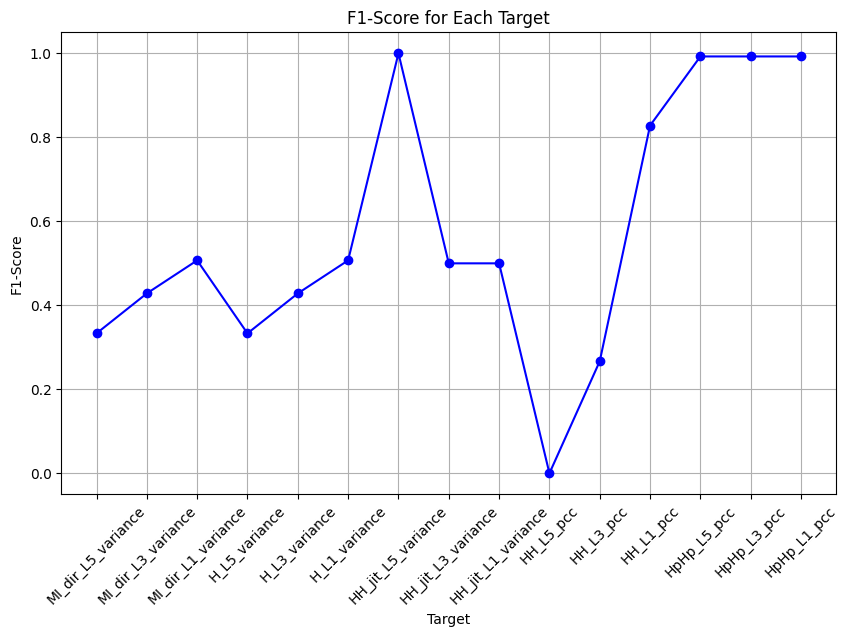

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    rf_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = rf_model.predict(X_valid)

    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

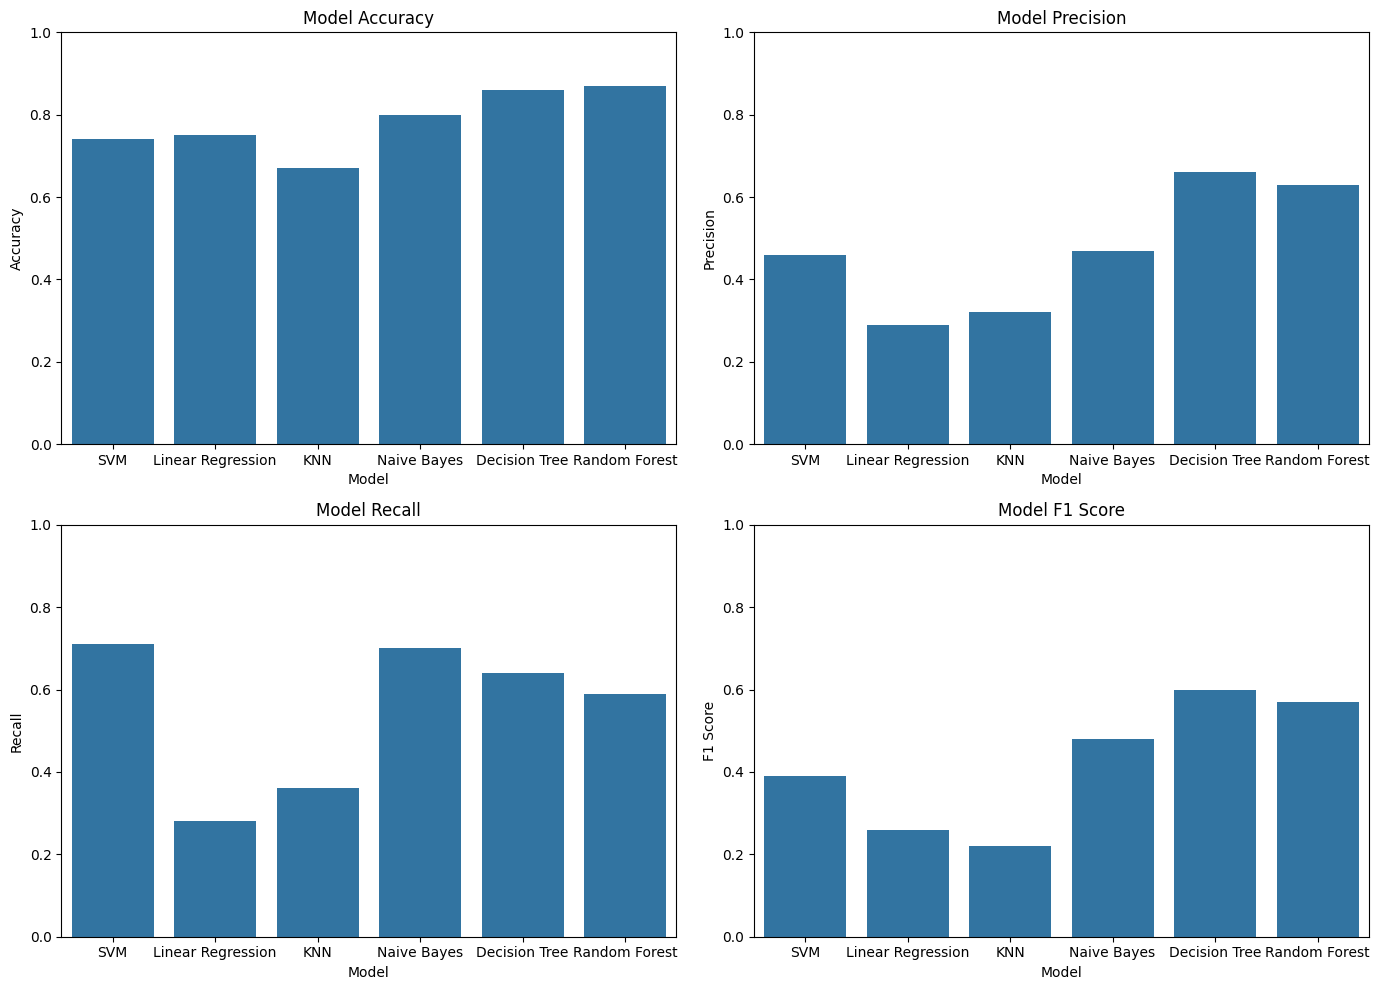

In [ ]:
data = {
    'Model': ['SVM', 'Linear Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.74, 0.75, 0.67, 0.80, 0.86, 0.87],
    'Precision': [0.46, 0.29, 0.32,0.47 ,0.66, 0.63],
    'Recall': [0.71, 0.28, 0.36, 0.70, 0.64, 0.59],
    'F1 Score': [0.39, 0.26, 0.22, 0.48, 0.60, 0.57]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()